# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_fae/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2005028997_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1889757798_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1890266440_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1527152775_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2092709730_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2029372696_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2005028997_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


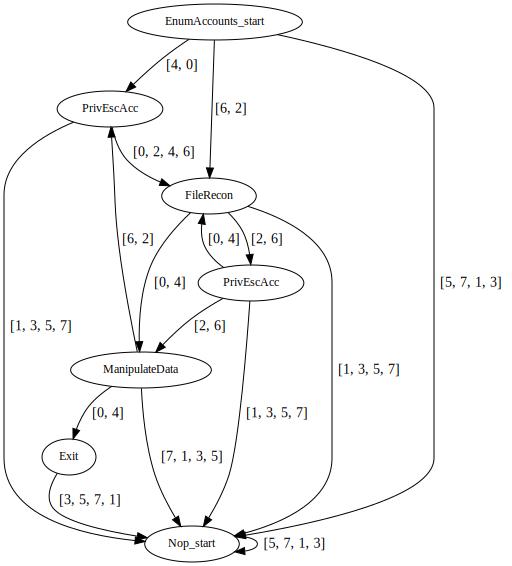

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1889757798_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


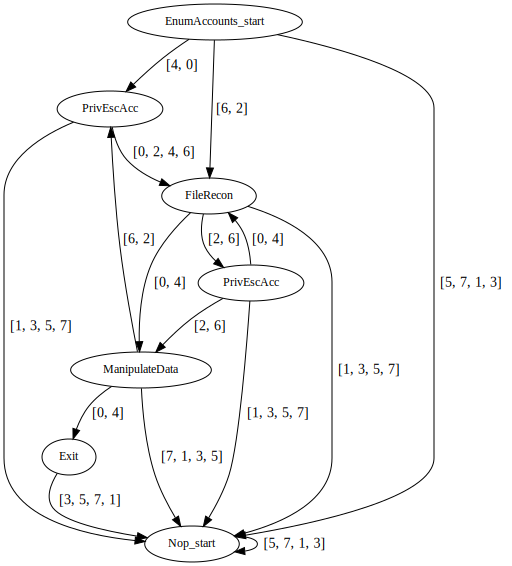

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1890266440_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


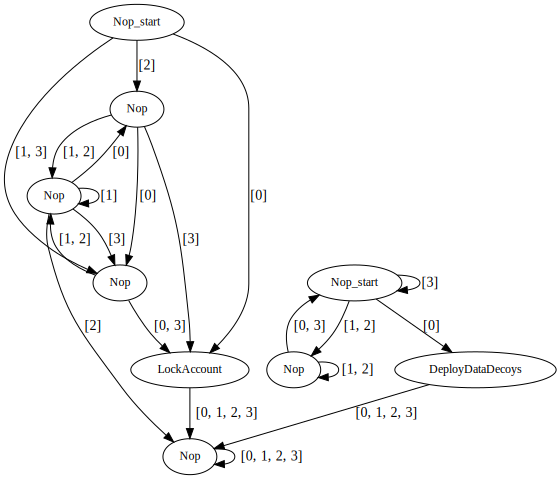

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1527152775_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


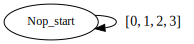

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2092709730_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]


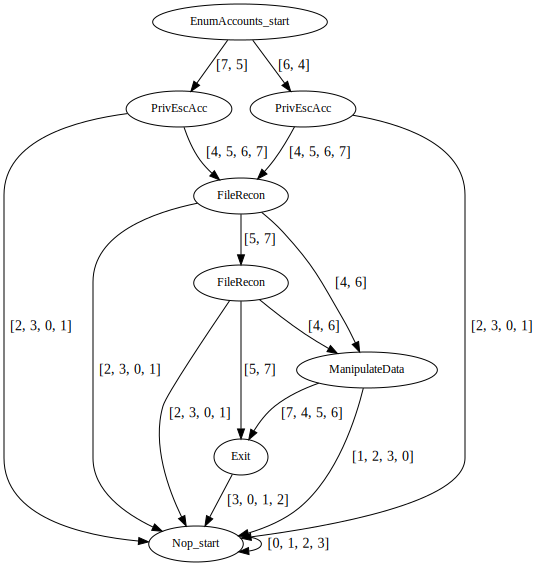

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2029372696_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


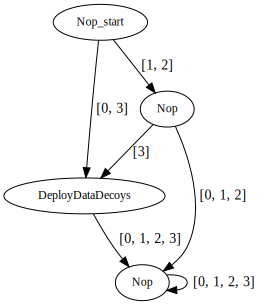

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.9.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.10.json
Using trace from /home/ashinde/PhD/CaffineBravery/res

+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

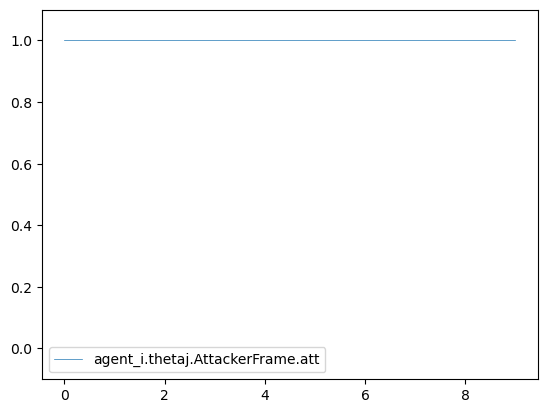

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.248127                        0.751873   
4                         0.155704                        0.844296   
5                         0.340898                        0.659102   
6                         0.340898                        0.659102   
7                         0.340898                        0.659102   
8                         0.340898                        0.659102   
9                         0.340898                        0.659102   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

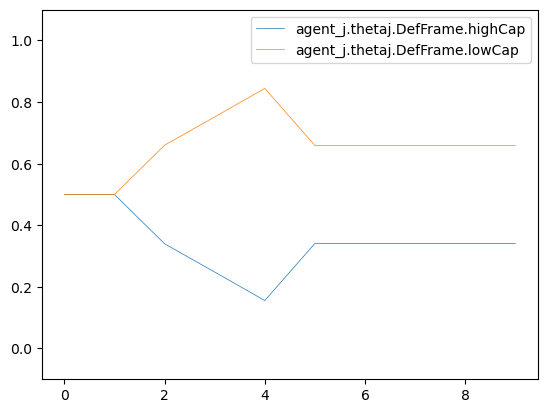

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

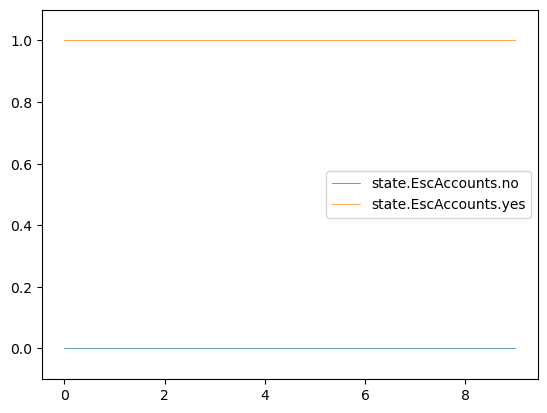

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

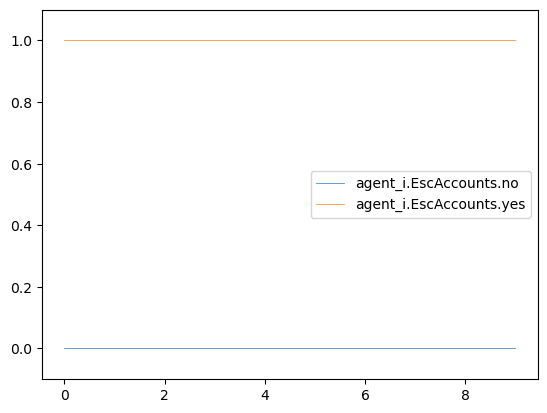

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.766601                 0.233399      PrivEscAcc   
2                0.155512                 0.844488       FileRecon   
3                0.192803                 0.807197       FileRecon   
4                0.233160                 0.766840  ManipulateData   
5                0.152269                 0.847731            Exit   
6                0.152269                 0.847731             Nop   
7                0.152269                 0.847731             Nop   
8                0.152269                 0.847731             Nop   
9                0.152269                 0.847731             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

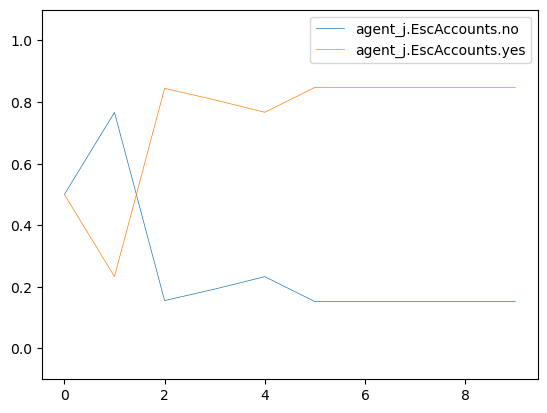

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0               Nop      PrivEscAcc
2                 0.0                  1.0  DeployDataDecoys       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

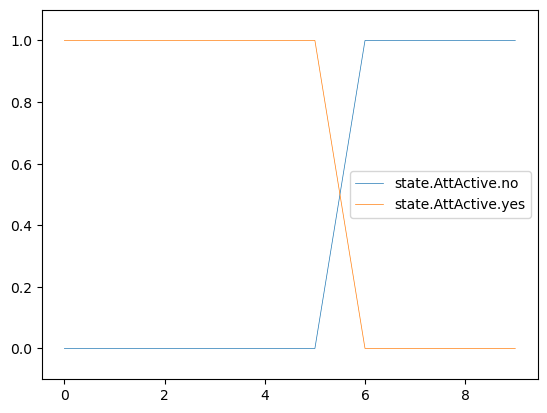

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000               0.500000               Nop   
1              0.987342               0.012658               Nop   
2              0.445714               0.554286  DeployDataDecoys   
3              0.008222               0.991778               Nop   
4              0.000095               0.999905               Nop   
5              0.069960               0.930040               Nop   
6              1.000000               0.000000               Nop   
7              1.000000               0.000000               Nop   
8              1.000000               0.000000               Nop   
9              1.000000               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

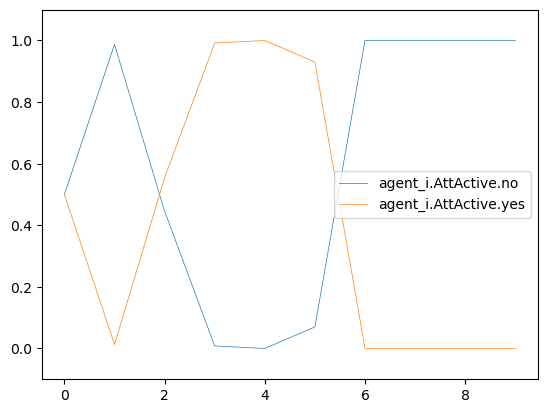

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

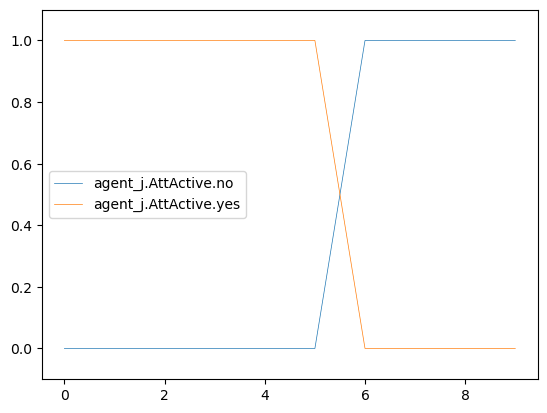

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0               Nop      PrivEscAcc
2                 1.0                  0.0  DeployDataDecoys       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

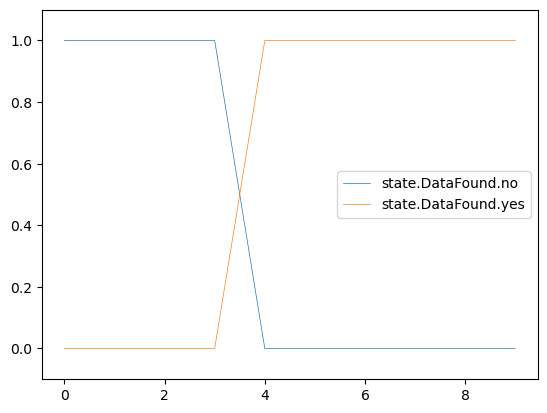

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208981               0.791019               Nop   
5              0.075627               0.924373               Nop   
6              0.075627               0.924373               Nop   
7              0.075627               0.924373               Nop   
8              0.075627               0.924373               Nop   
9              0.075627               0.924373               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

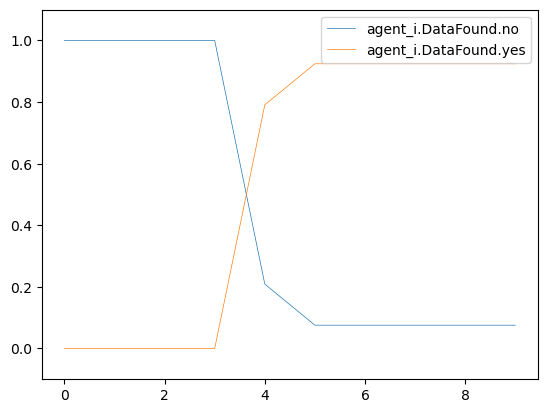

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.780829               0.219171       FileRecon   
4              0.867406               0.132594  ManipulateData   
5              0.395793               0.604207            Exit   
6              0.395793               0.604207             Nop   
7              0.395793               0.604207             Nop   
8              0.395793               0.604207             Nop   
9              0.395793               0.604207             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

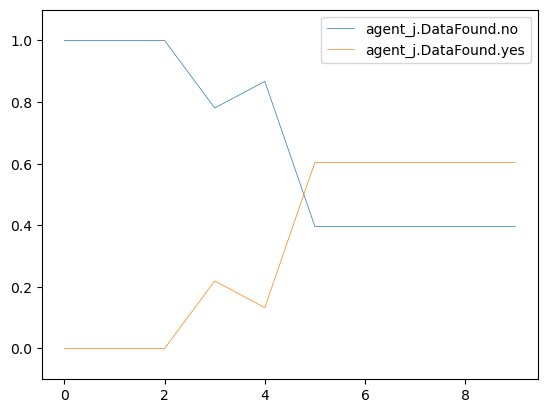

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

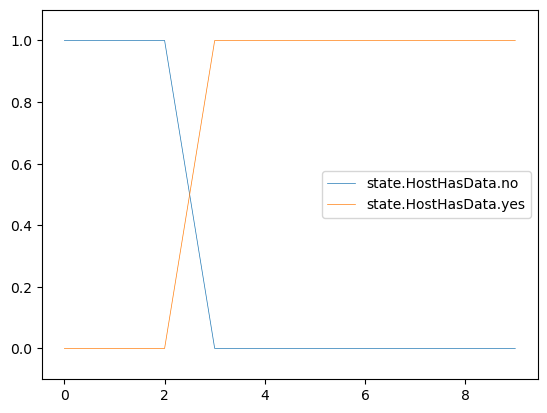

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

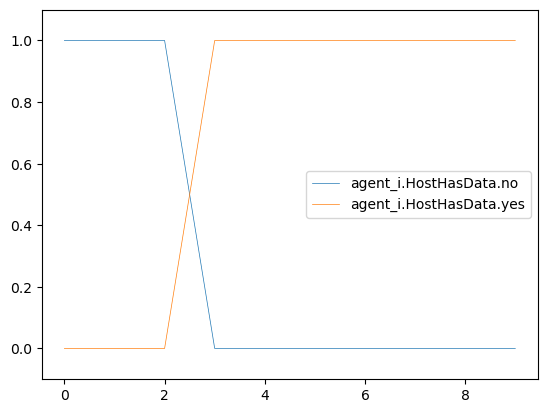

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.339934                 0.660066       FileRecon   
3                0.515742                 0.484258       FileRecon   
4                0.697800                 0.302200  ManipulateData   
5                0.318266                 0.681734            Exit   
6                0.318265                 0.681735             Nop   
7                0.318265                 0.681735             Nop   
8                0.318265                 0.681735             Nop   
9                0.318265                 0.681735             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

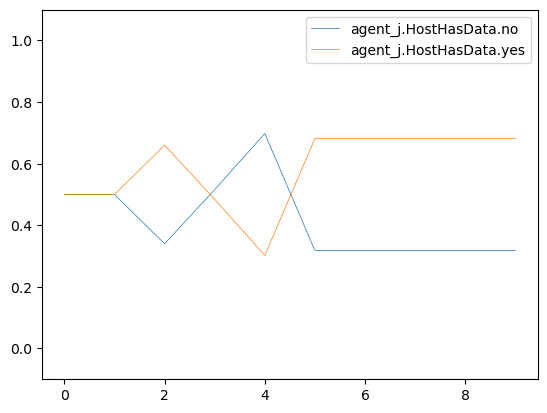

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

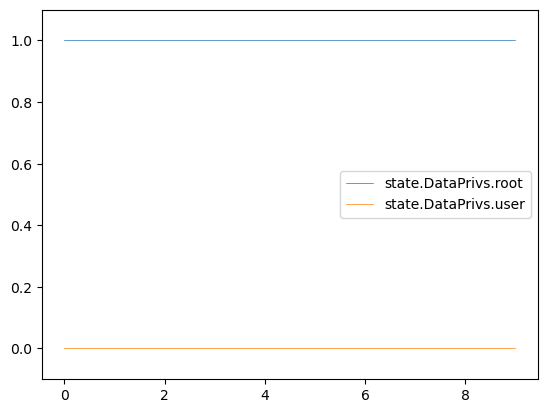

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

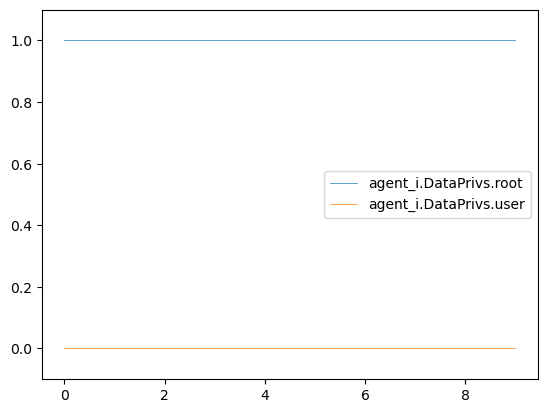

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.522341                0.477659       FileRecon   
4                0.546519                0.453481  ManipulateData   
5                0.498057                0.501943            Exit   
6                0.498057                0.501943             Nop   
7                0.498057                0.501943             Nop   
8                0.498057                0.501943             Nop   
9                0.498057                0.501943             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

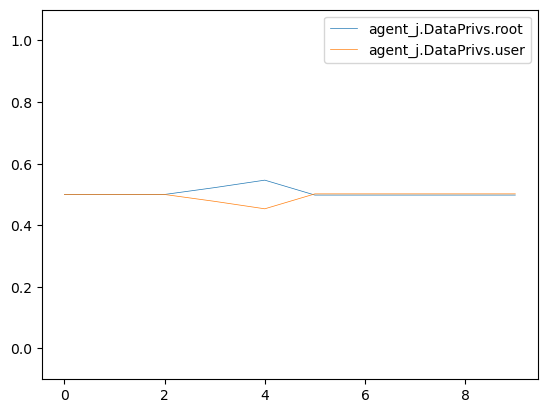

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

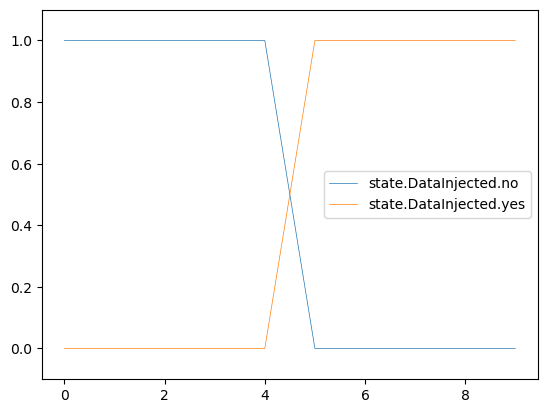

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                  1.00000                   0.00000               Nop   
1                  1.00000                   0.00000               Nop   
2                  1.00000                   0.00000  DeployDataDecoys   
3                  1.00000                   0.00000               Nop   
4                  1.00000                   0.00000               Nop   
5                  0.09633                   0.90367               Nop   
6                  0.09633                   0.90367               Nop   
7                  0.09633                   0.90367               Nop   
8                  0.09633                   0.90367               Nop   
9                  0.09633                   0.90367               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

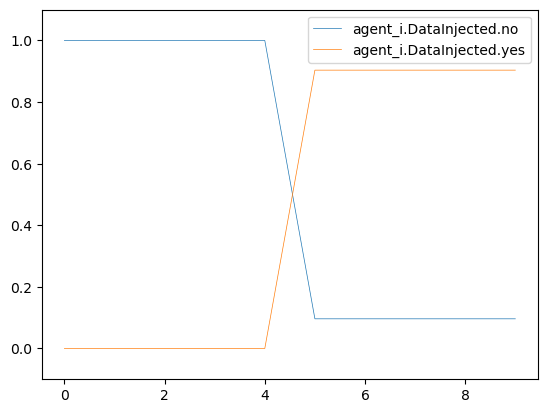

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.395793                  0.604207            Exit   
6                 0.395793                  0.604207             Nop   
7                 0.395793                  0.604207             Nop   
8                 0.395793                  0.604207             Nop   
9                 0.395793                  0.604207             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

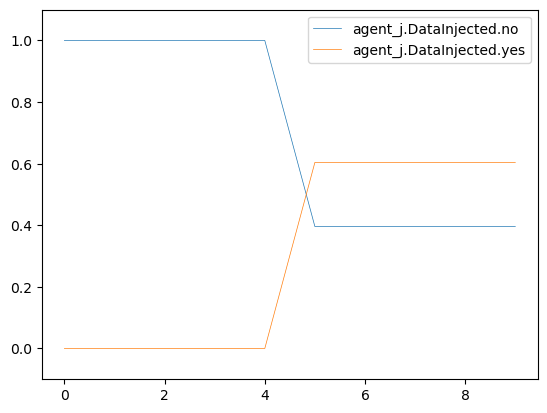

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0               Nop      PrivEscAcc  
2                      1.0  DeployDataDecoys       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

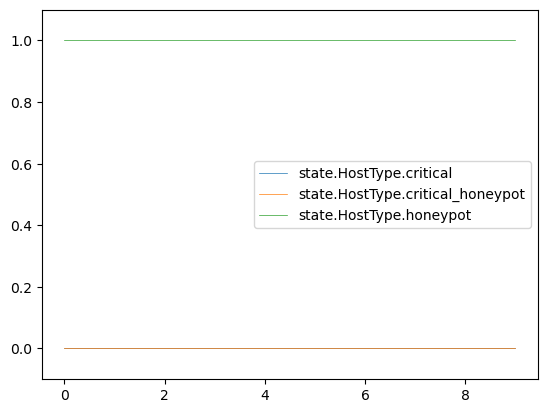

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0               Nop      PrivEscAcc   
2                        1.0  DeployDataDecoys       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                         su_login  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

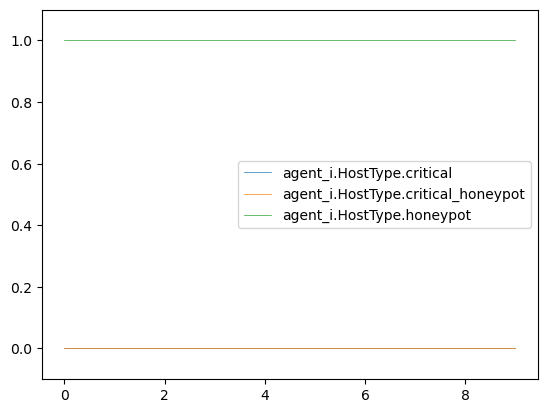

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc               Nop   
2                        0.0       FileRecon  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

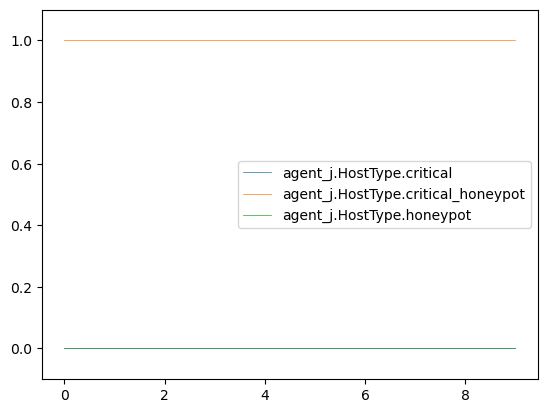

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

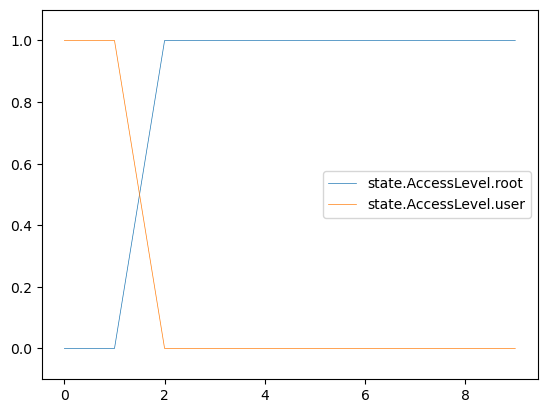

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.548743                  0.451257  DeployDataDecoys   
3                  0.981860                  0.018140               Nop   
4                  0.989906                  0.010094               Nop   
5                  0.996352                  0.003648               Nop   
6                  0.996352                  0.003648               Nop   
7                  0.996352                  0.003648               Nop   
8                  0.996352                  0.003648               Nop   
9                  0.996352                  0.003648               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

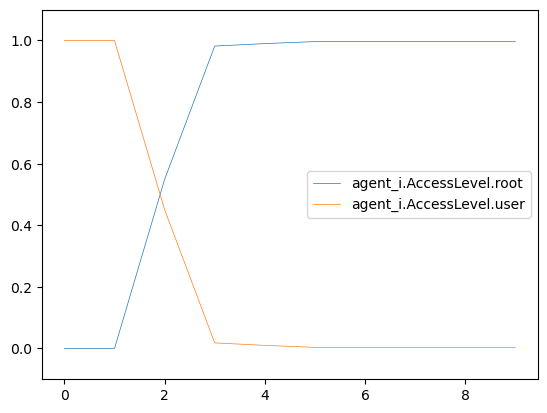

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.842933                  0.157067       FileRecon   
3                  0.805269                  0.194731       FileRecon   
4                  0.764509                  0.235491  ManipulateData   
5                  0.846208                  0.153792            Exit   
6                  0.846208                  0.153792             Nop   
7                  0.846208                  0.153792             Nop   
8                  0.846208                  0.153792             Nop   
9                  0.846208                  0.153792             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

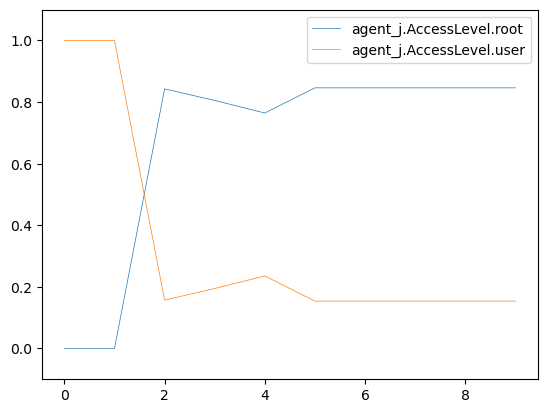

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0               Nop      PrivEscAcc
2                0.0                 1.0  DeployDataDecoys       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

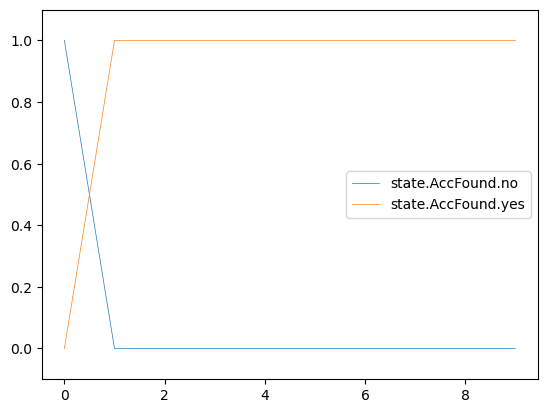

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.987468              0.012532               Nop   
2             0.451257              0.548743  DeployDataDecoys   
3             0.018140              0.981860               Nop   
4             0.010094              0.989906               Nop   
5             0.003648              0.996352               Nop   
6             0.003648              0.996352               Nop   
7             0.003648              0.996352               Nop   
8             0.003648              0.996352               Nop   
9             0.003648              0.996352               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

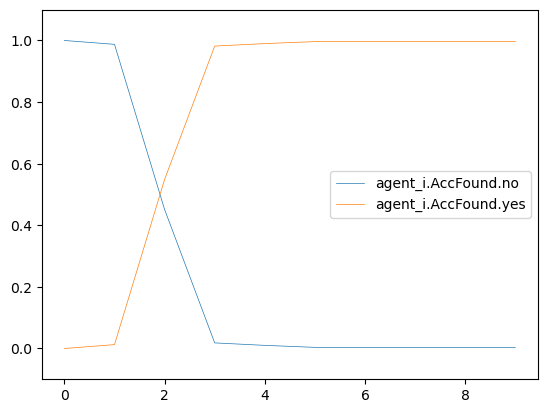

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.774267              0.225733      PrivEscAcc   
2             0.157067              0.842933       FileRecon   
3             0.194731              0.805269       FileRecon   
4             0.235491              0.764509  ManipulateData   
5             0.153792              0.846208            Exit   
6             0.153792              0.846208             Nop   
7             0.153792              0.846208             Nop   
8             0.153792              0.846208             Nop   
9             0.153792              0.846208             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

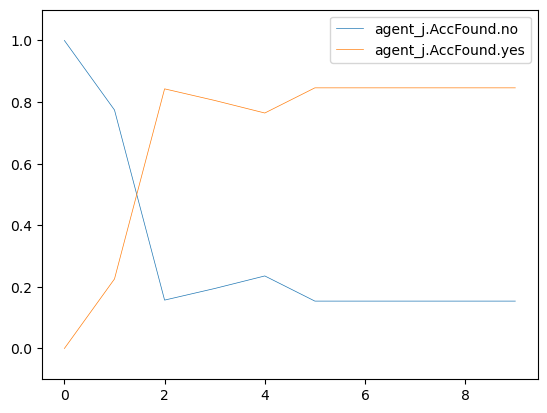

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

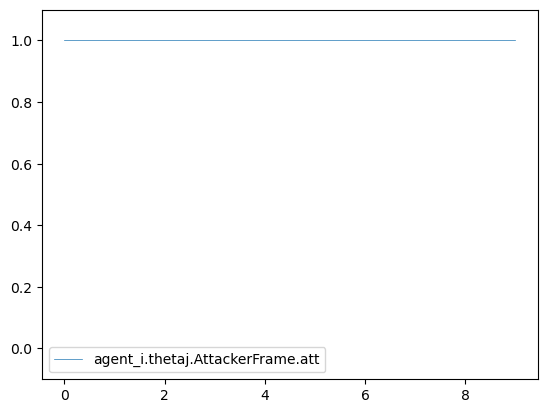

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.239513                        0.760487   
4                         0.359770                        0.640230   
5                         0.493067                        0.506933   
6                         0.493067                        0.506933   
7                         0.493067                        0.506933   
8                         0.493067                        0.506933   
9                         0.493067                        0.506933   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

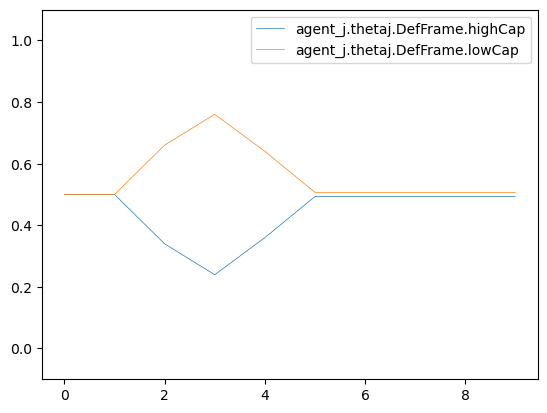

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

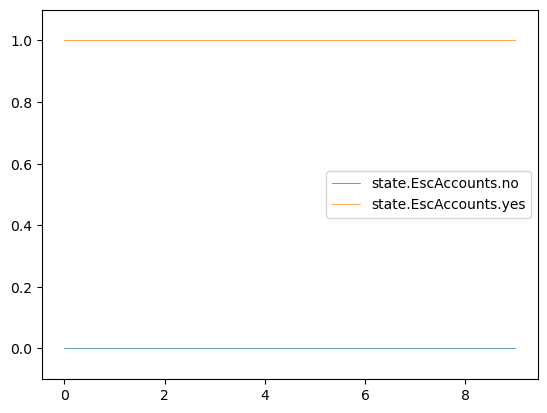

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

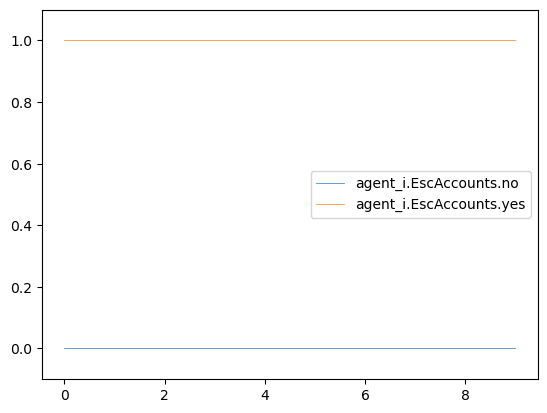

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.232378                 0.767622      PrivEscAcc   
2                0.001829                 0.998171       FileRecon   
3                0.002357                 0.997643       FileRecon   
4                0.001682                 0.998318  ManipulateData   
5                0.000934                 0.999066            Exit   
6                0.000934                 0.999066             Nop   
7                0.000934                 0.999066             Nop   
8                0.000934                 0.999066             Nop   
9                0.000934                 0.999066             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

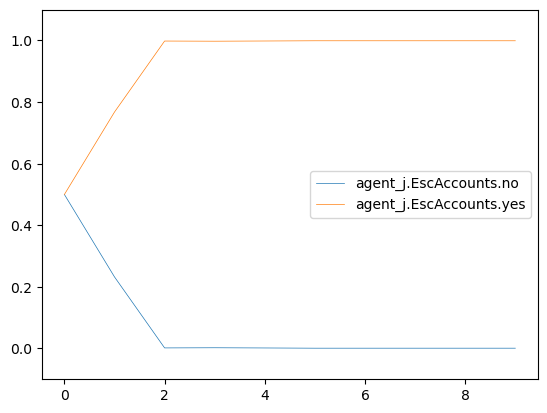

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

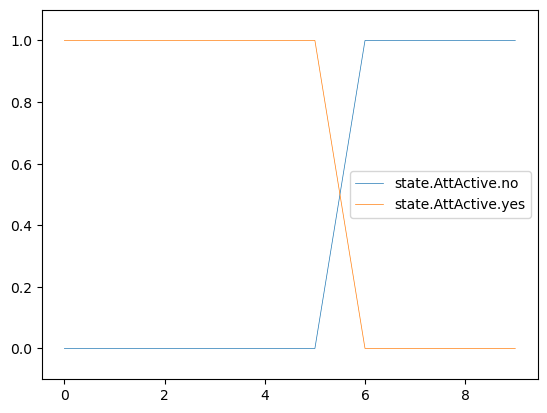

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01               0.500000               Nop   
1          1.020408e-02               0.989796  DeployDataDecoys   
2          1.062699e-04               0.999894               Nop   
3          1.095681e-06               0.999999               Nop   
4          4.123076e-08               1.000000               Nop   
5          6.598561e-02               0.934014               Nop   
6          9.999999e-01               0.000000               Nop   
7          9.999999e-01               0.000000               Nop   
8          9.999999e-01               0.000000               Nop   
9          9.999999e-01               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

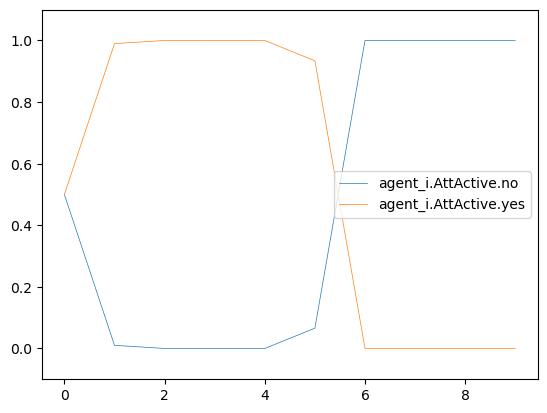

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

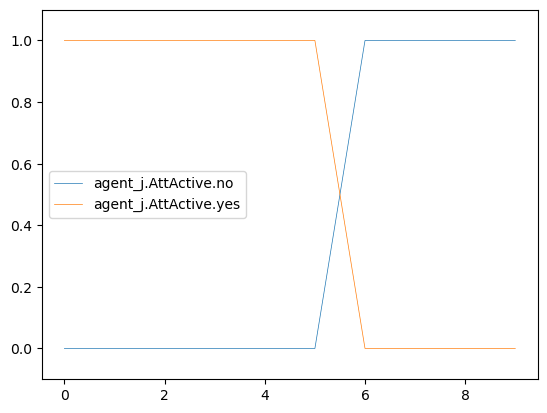

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

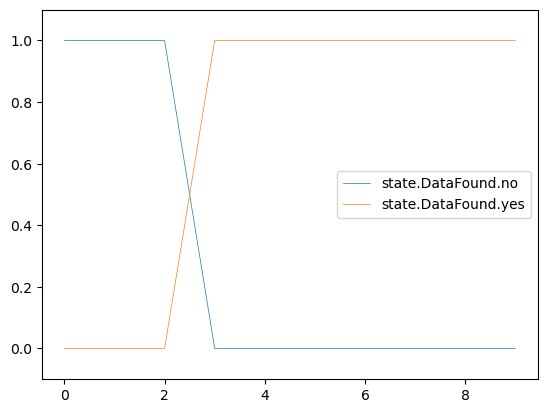

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.208001               0.791999               Nop   
4              0.163725               0.836276               Nop   
5              0.058554               0.941446               Nop   
6              0.058554               0.941446               Nop   
7              0.058554               0.941446               Nop   
8              0.058554               0.941446               Nop   
9              0.058554               0.941446               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

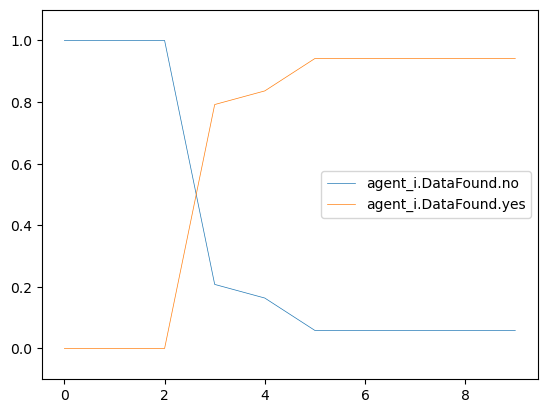

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.743141               0.256859       FileRecon   
4              0.306405               0.693595  ManipulateData   
5              0.007303               0.992697            Exit   
6              0.007303               0.992697             Nop   
7              0.007303               0.992698             Nop   
8              0.007303               0.992697             Nop   
9              0.007303               0.992697             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

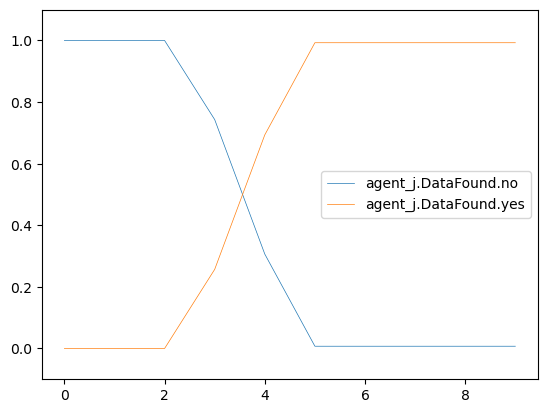

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

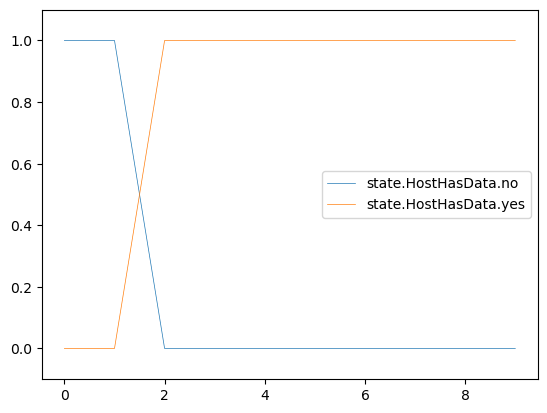

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

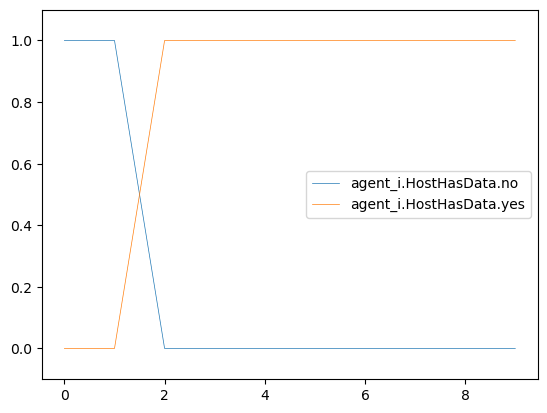

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.339934                 0.660066       FileRecon   
3                0.533643                 0.466357       FileRecon   
4                0.279746                 0.720254  ManipulateData   
5                0.006664                 0.993336            Exit   
6                0.006664                 0.993336             Nop   
7                0.006664                 0.993336             Nop   
8                0.006664                 0.993336             Nop   
9                0.006664                 0.993336             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

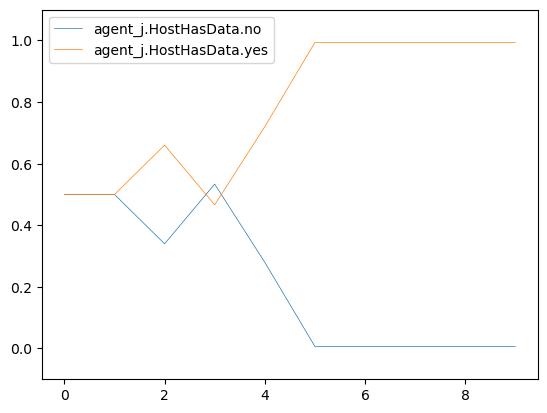

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

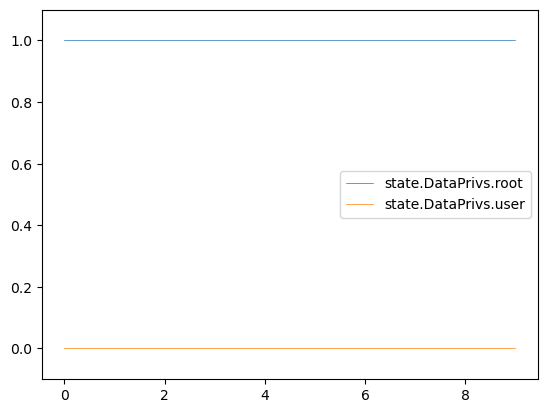

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

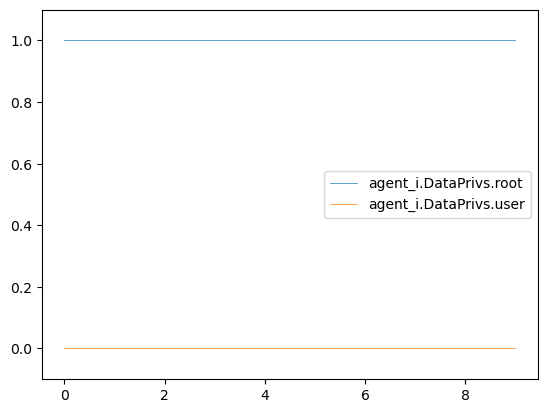

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.500267                0.499733       FileRecon   
4                0.499925                0.500075  ManipulateData   
5                0.499547                0.500453            Exit   
6                0.499547                0.500453             Nop   
7                0.499547                0.500453             Nop   
8                0.499547                0.500453             Nop   
9                0.499547                0.500453             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

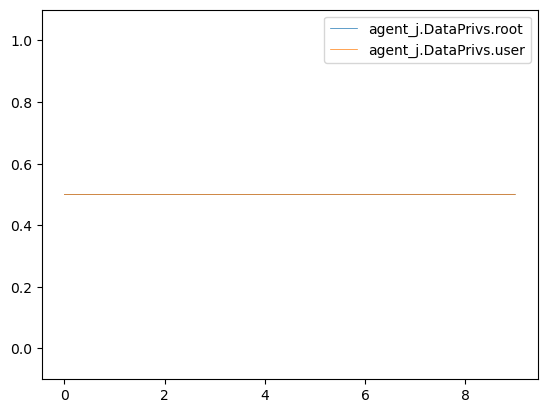

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

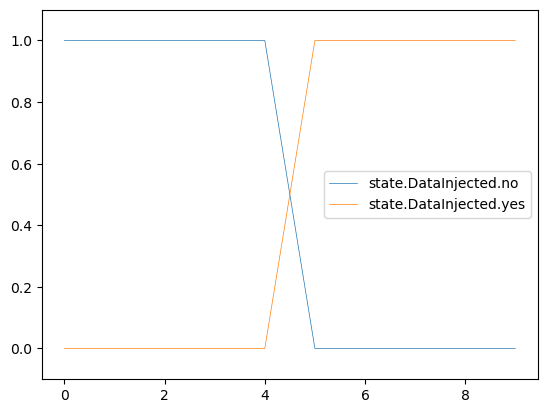

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.973177                  0.026823               Nop   
5                 0.079484                  0.920516               Nop   
6                 0.079484                  0.920516               Nop   
7                 0.079484                  0.920516               Nop   
8                 0.079484                  0.920516               Nop   
9                 0.079484                  0.920516               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

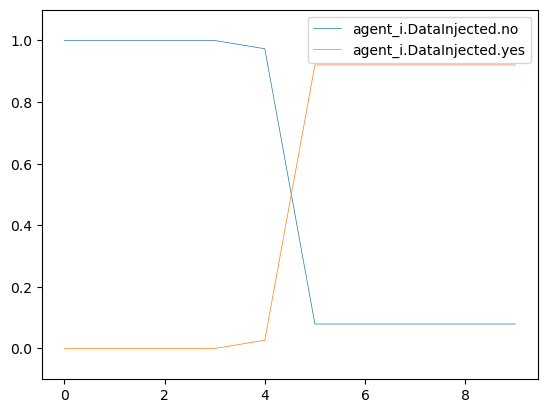

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.007303                  0.992697            Exit   
6                 0.007303                  0.992697             Nop   
7                 0.007303                  0.992698             Nop   
8                 0.007303                  0.992697             Nop   
9                 0.007303                  0.992697             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

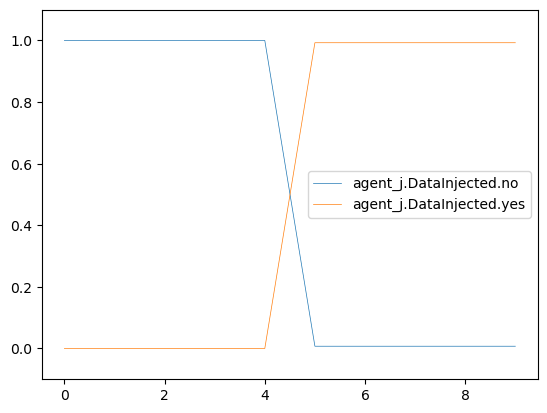

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

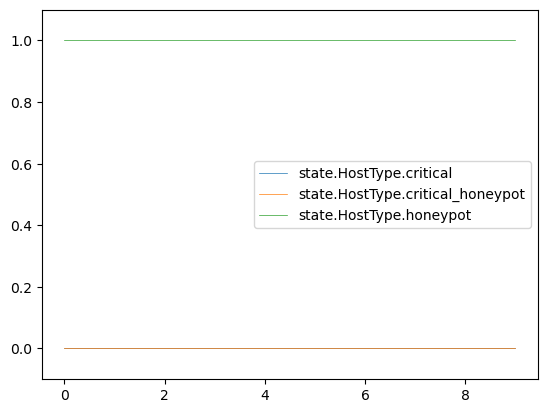

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

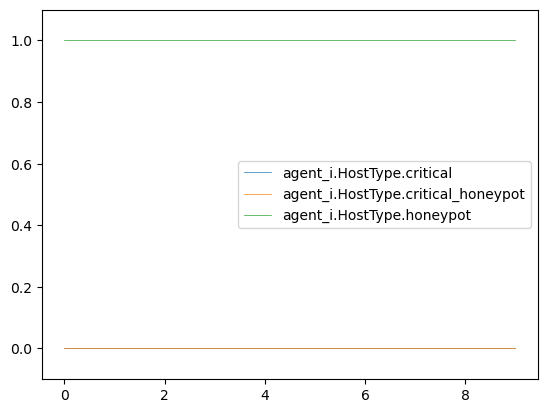

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

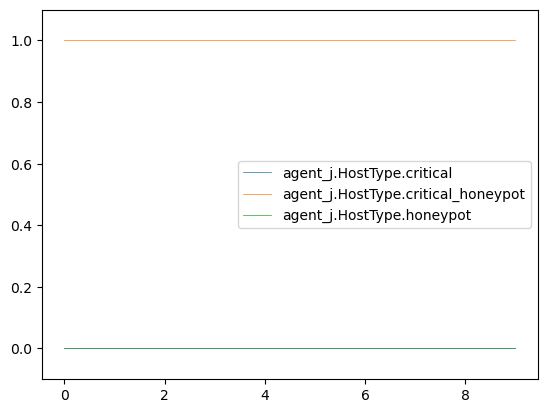

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

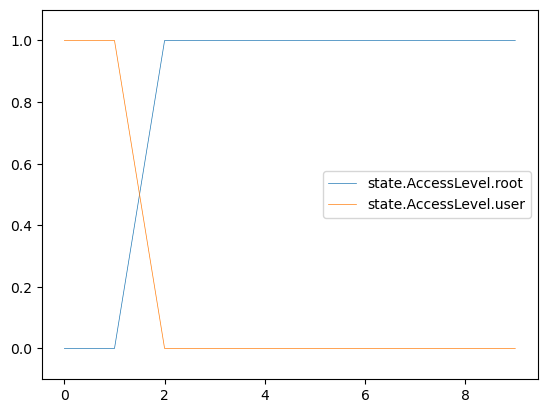

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.989895                  0.010105               Nop   
3                  0.989999                  0.010001               Nop   
4                  0.967111                  0.032889               Nop   
5                  0.988226                  0.011774               Nop   
6                  0.988226                  0.011774               Nop   
7                  0.988226                  0.011774               Nop   
8                  0.988226                  0.011774               Nop   
9                  0.988226                  0.011774               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

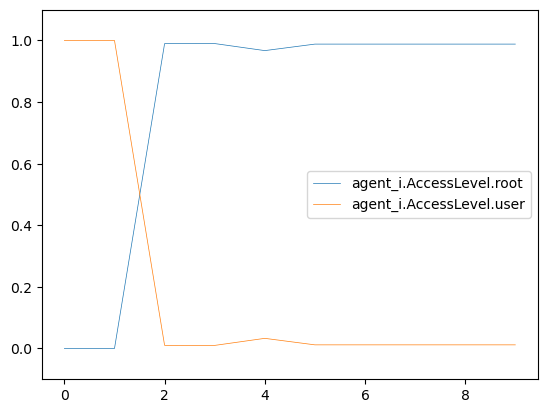

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.998152                  0.001848       FileRecon   
3                  0.997619                  0.002380       FileRecon   
4                  0.998301                  0.001699  ManipulateData   
5                  0.999057                  0.000943            Exit   
6                  0.999057                  0.000943             Nop   
7                  0.999057                  0.000943             Nop   
8                  0.999057                  0.000943             Nop   
9                  0.999057                  0.000943             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

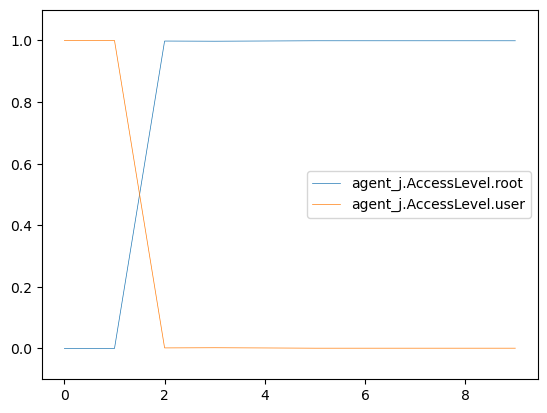

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

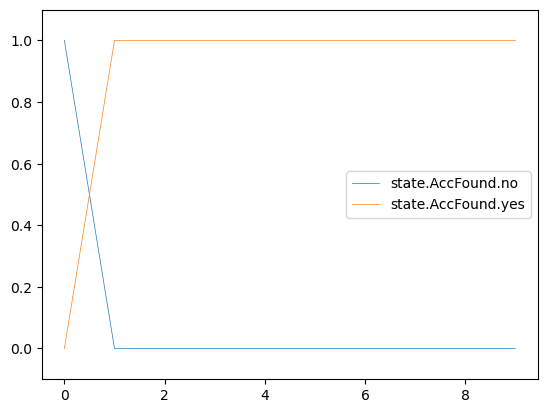

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.020102              0.979898  DeployDataDecoys   
2             0.010105              0.989895               Nop   
3             0.010001              0.989999               Nop   
4             0.032889              0.967111               Nop   
5             0.011774              0.988226               Nop   
6             0.011774              0.988226               Nop   
7             0.011774              0.988226               Nop   
8             0.011774              0.988226               Nop   
9             0.011774              0.988226               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

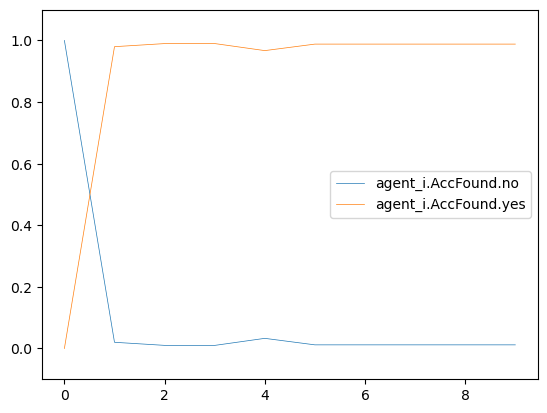

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.234702              0.765298      PrivEscAcc   
2             0.001848              0.998152       FileRecon   
3             0.002380              0.997619       FileRecon   
4             0.001699              0.998301  ManipulateData   
5             0.000943              0.999057            Exit   
6             0.000943              0.999057             Nop   
7             0.000943              0.999057             Nop   
8             0.000943              0.999057             Nop   
9             0.000943              0.999057             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

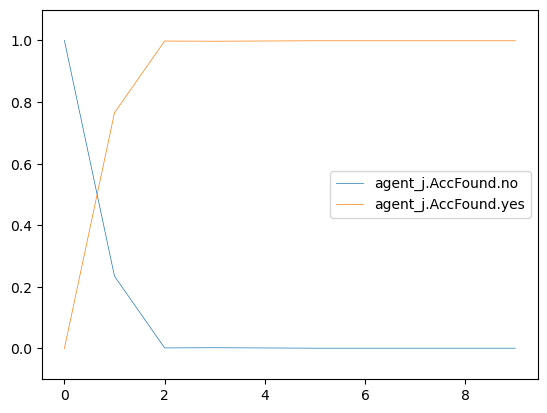

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                       file_write

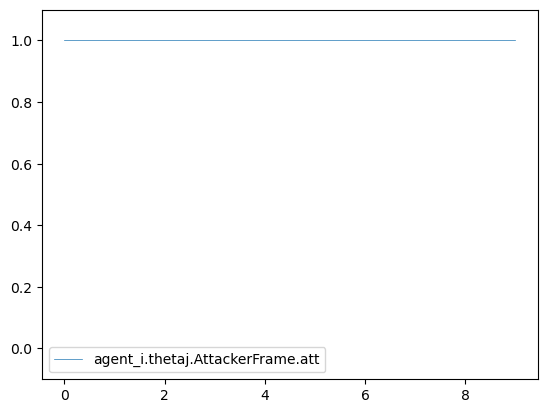

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.425260                        0.574741   
4                         0.495160                        0.504840   
5                         0.495160                        0.504840   
6                         0.495160                        0.504840   
7                         0.495160                        0.504840   
8                         0.495160                        0.504840   
9                         0.495160                        0.504840   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

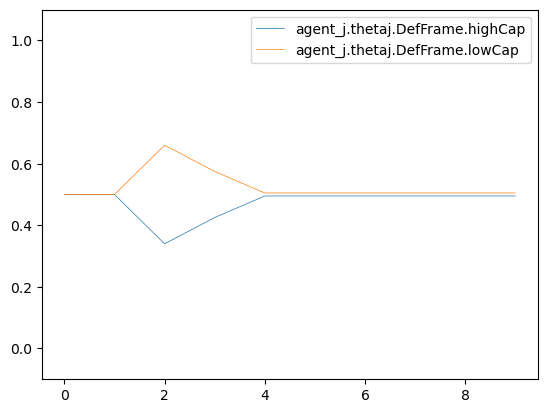

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

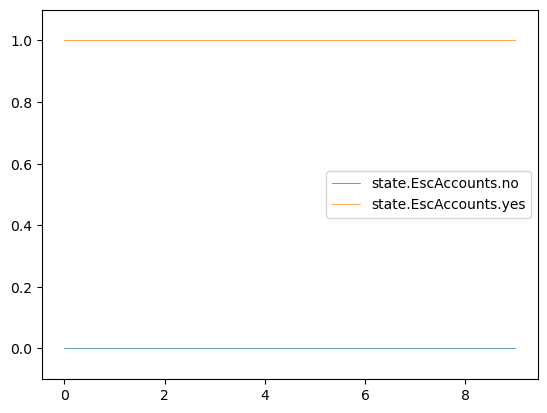

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

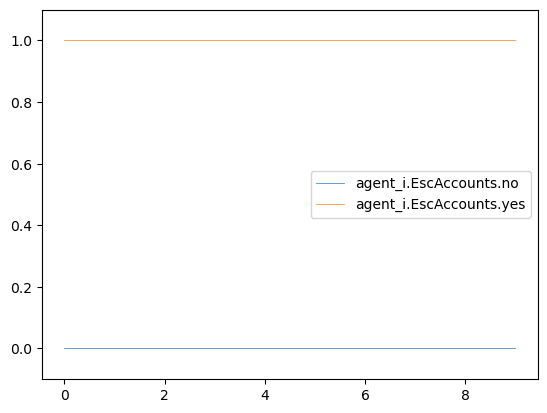

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.232378                 0.767622      PrivEscAcc   
2                0.001829                 0.998171       FileRecon   
3                0.001314                 0.998686  ManipulateData   
4                0.000922                 0.999078            Exit   
5                0.000922                 0.999078             Nop   
6                0.000922                 0.999078             Nop   
7                0.000922                 0.999078             Nop   
8                0.000922                 0.999078             Nop   
9                0.000922                 0.999078             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

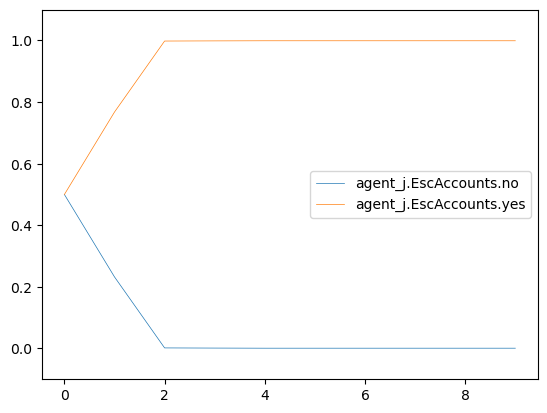

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 1.0                  0.0               Nop             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

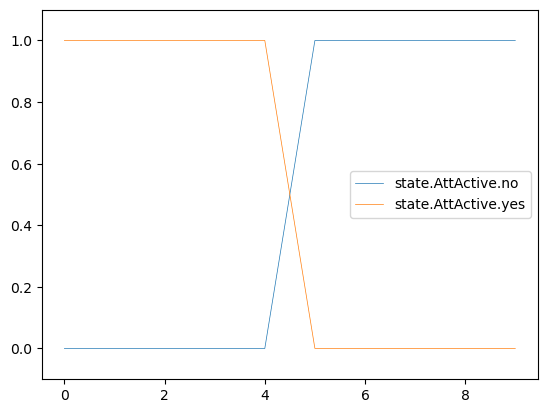

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01               0.500000               Nop   
1          1.020408e-02               0.989796  DeployDataDecoys   
2          1.062699e-04               0.999894               Nop   
3          1.095681e-06               0.999999               Nop   
4          3.068038e-07               1.000000               Nop   
5          9.999632e-01               0.000037               Nop   
6          1.000000e+00               0.000000               Nop   
7          1.000000e+00               0.000000               Nop   
8          1.000000e+00               0.000000               Nop   
9          1.000000e+00               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

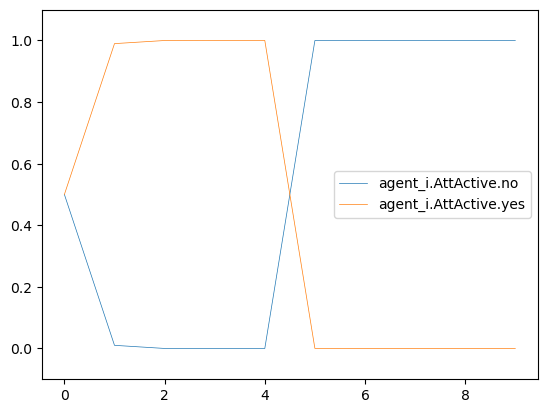

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0  ManipulateData   
4                   0.0                    1.0            Exit   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

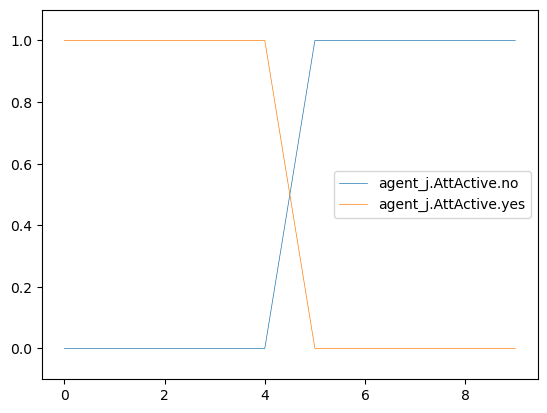

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 0.0                  1.0               Nop             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

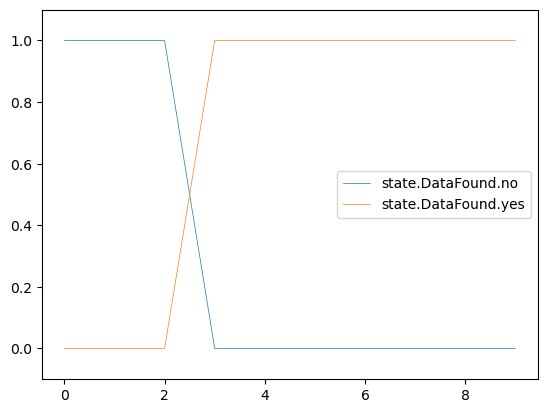

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.208001               0.791999               Nop   
4              0.028873               0.971127               Nop   
5              0.028893               0.971107               Nop   
6              0.028893               0.971107               Nop   
7              0.028893               0.971107               Nop   
8              0.028893               0.971107               Nop   
9              0.028893               0.971107               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

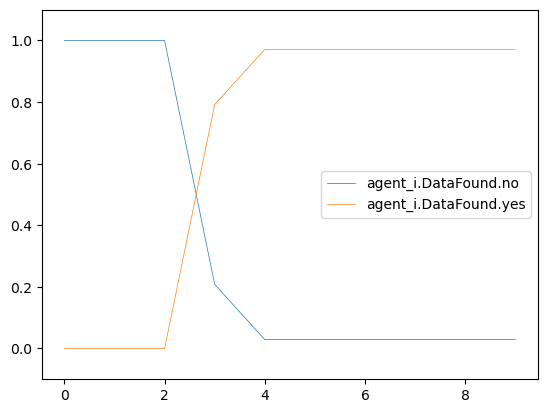

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.205613               0.794387  ManipulateData   
4              0.003293               0.996707            Exit   
5              0.003293               0.996707             Nop   
6              0.003293               0.996707             Nop   
7              0.003293               0.996707             Nop   
8              0.003293               0.996707             Nop   
9              0.003293               0.996707             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

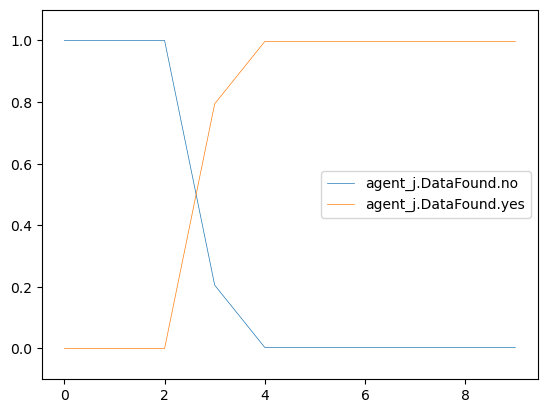

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

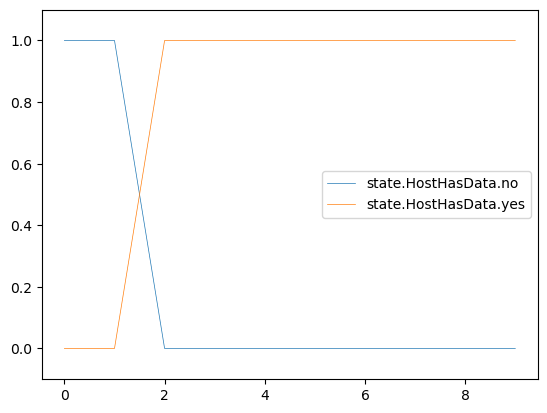

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

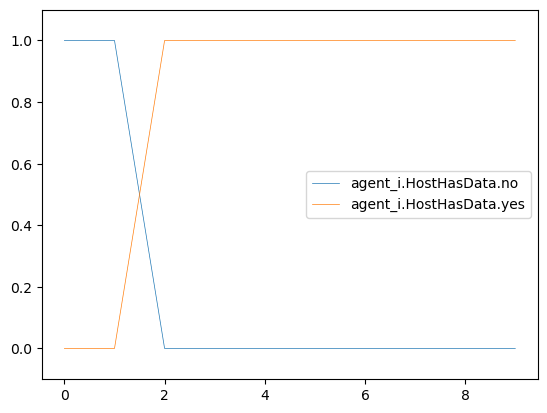

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.339934                 0.660066       FileRecon   
3                0.147649                 0.852351  ManipulateData   
4                0.002332                 0.997668            Exit   
5                0.002332                 0.997668             Nop   
6                0.002332                 0.997668             Nop   
7                0.002332                 0.997668             Nop   
8                0.002332                 0.997668             Nop   
9                0.002332                 0.997668             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

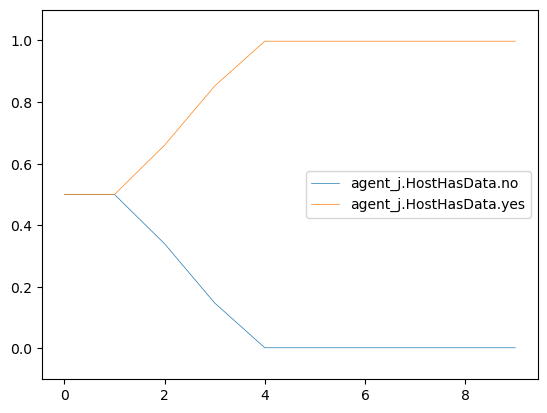

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

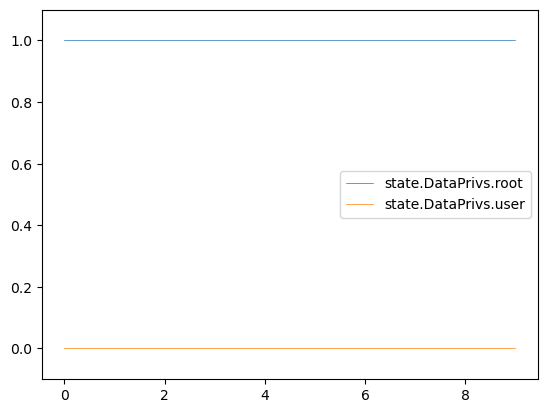

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

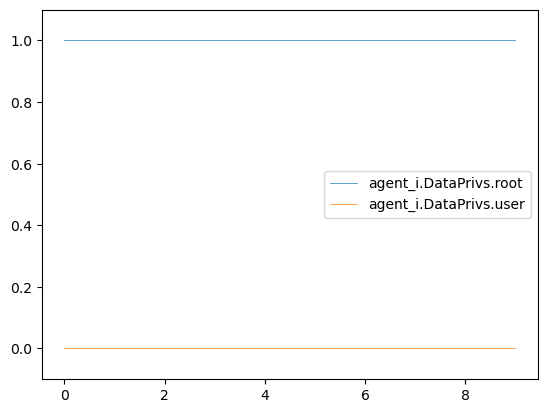

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.499739                0.500261  ManipulateData   
4                0.499541                0.500459            Exit   
5                0.499541                0.500459             Nop   
6                0.499541                0.500459             Nop   
7                0.499541                0.500459             Nop   
8                0.499541                0.500459             Nop   
9                0.499541                0.500459             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

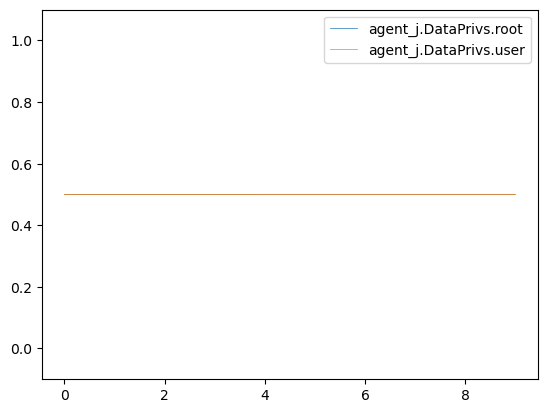

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

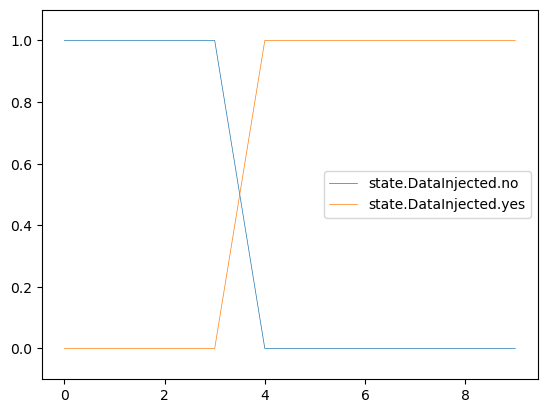

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.031978                  0.968022               Nop   
5                 0.029204                  0.970796               Nop   
6                 0.029204                  0.970796               Nop   
7                 0.029204                  0.970796               Nop   
8                 0.029204                  0.970796               Nop   
9                 0.029204                  0.970796               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

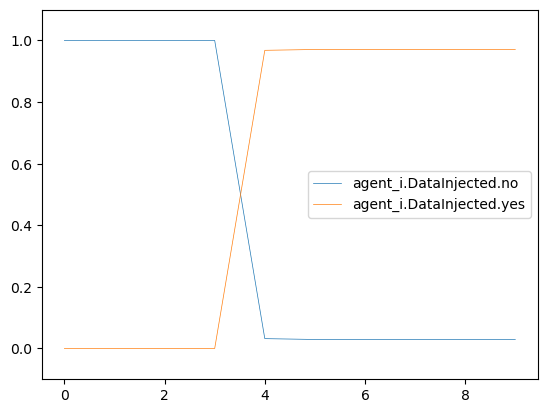

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000  ManipulateData   
4                 0.003293                  0.996707            Exit   
5                 0.003293                  0.996707             Nop   
6                 0.003293                  0.996707             Nop   
7                 0.003293                  0.996707             Nop   
8                 0.003293                  0.996707             Nop   
9                 0.003293                  0.996707             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

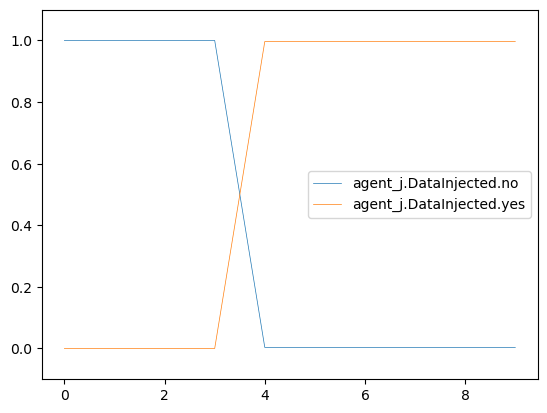

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop  ManipulateData  
4                      1.0               Nop            Exit  
5                      1.0               Nop             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

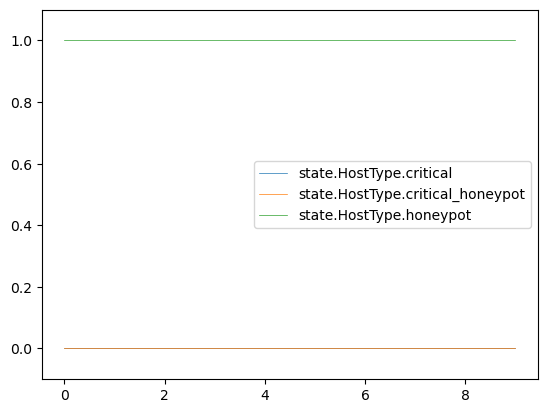

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop  ManipulateData   
4                        1.0               Nop            Exit   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                       file_write

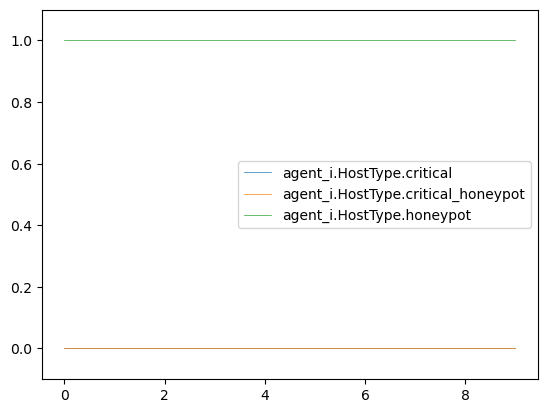

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0  ManipulateData               Nop   
4                        0.0            Exit               Nop   
5                        0.0             Nop               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

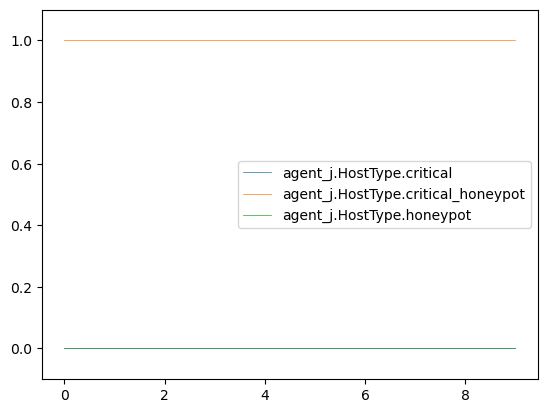

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

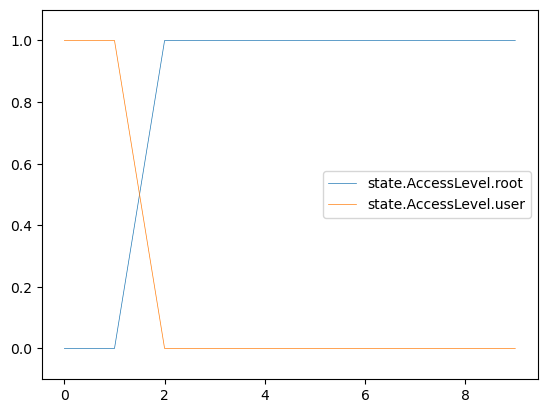

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.989895                  0.010105               Nop   
3                  0.989999                  0.010001               Nop   
4                  0.998516                  0.001484               Nop   
5                  0.998524                  0.001476               Nop   
6                  0.998524                  0.001476               Nop   
7                  0.998524                  0.001476               Nop   
8                  0.998524                  0.001476               Nop   
9                  0.998524                  0.001476               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

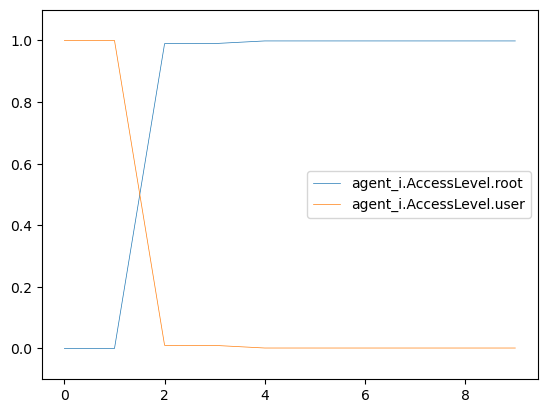

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.998152                  0.001848       FileRecon   
3                  0.998673                  0.001327  ManipulateData   
4                  0.999069                  0.000931            Exit   
5                  0.999069                  0.000931             Nop   
6                  0.999069                  0.000931             Nop   
7                  0.999069                  0.000931             Nop   
8                  0.999069                  0.000931             Nop   
9                  0.999069                  0.000931             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

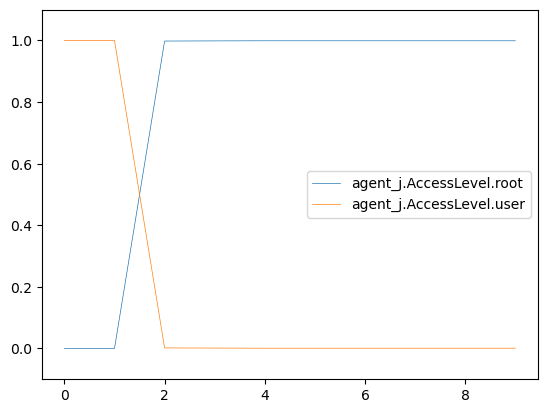

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop  ManipulateData
4                0.0                 1.0               Nop            Exit
5                0.0                 1.0               Nop             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

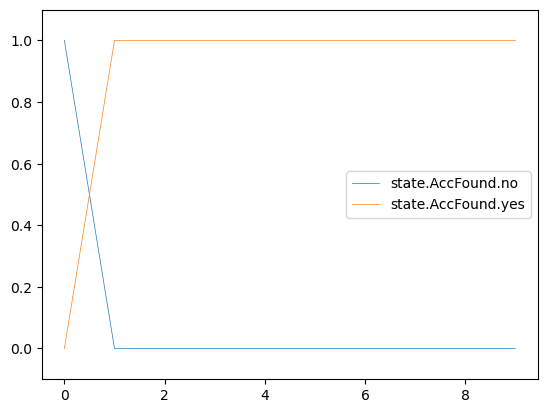

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.020102              0.979898  DeployDataDecoys   
2             0.010105              0.989895               Nop   
3             0.010001              0.989999               Nop   
4             0.001484              0.998516               Nop   
5             0.001476              0.998524               Nop   
6             0.001476              0.998524               Nop   
7             0.001476              0.998524               Nop   
8             0.001476              0.998524               Nop   
9             0.001476              0.998524               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

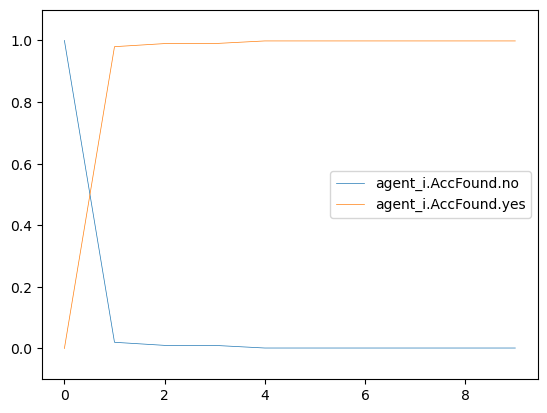

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.234702              0.765298      PrivEscAcc   
2             0.001848              0.998152       FileRecon   
3             0.001327              0.998673  ManipulateData   
4             0.000931              0.999069            Exit   
5             0.000931              0.999069             Nop   
6             0.000931              0.999069             Nop   
7             0.000931              0.999069             Nop   
8             0.000931              0.999069             Nop   
9             0.000931              0.999069             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

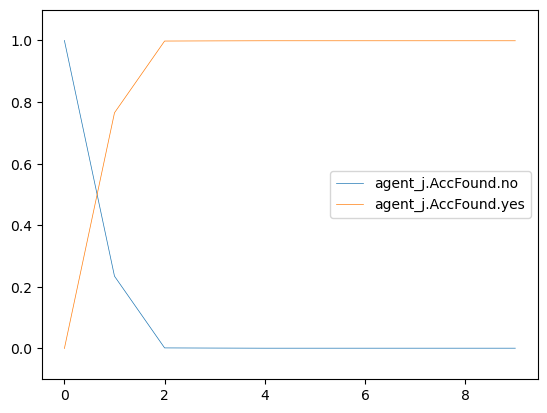

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

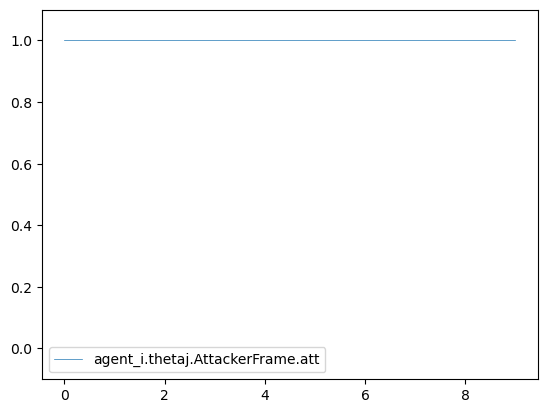

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.425260                        0.574741   
4                         0.495160                        0.504840   
5                         0.495160                        0.504840   
6                         0.495160                        0.504840   
7                         0.495160                        0.504840   
8                         0.495160                        0.504840   
9                         0.495160                        0.504840   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

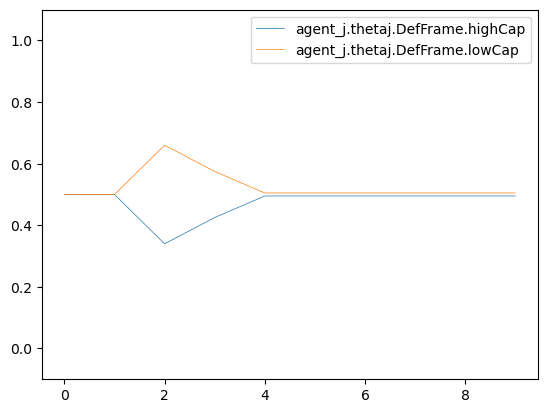

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

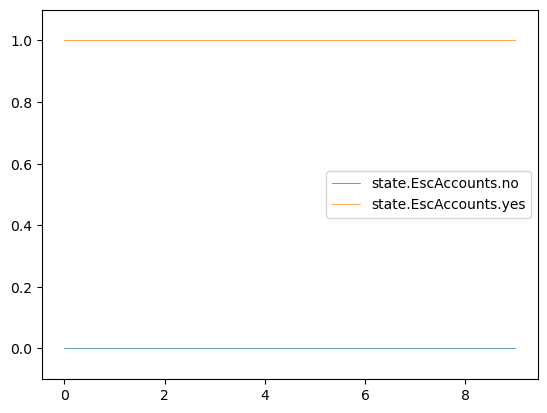

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

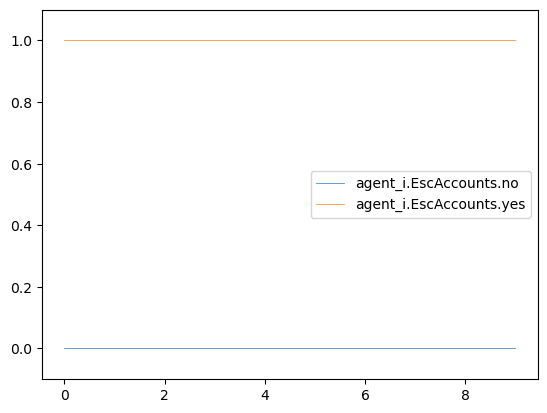

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.232378                 0.767622      PrivEscAcc   
2                0.001829                 0.998171       FileRecon   
3                0.001314                 0.998686  ManipulateData   
4                0.000922                 0.999078            Exit   
5                0.000922                 0.999078             Nop   
6                0.000922                 0.999078             Nop   
7                0.000922                 0.999078             Nop   
8                0.000922                 0.999078             Nop   
9                0.000922                 0.999078             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

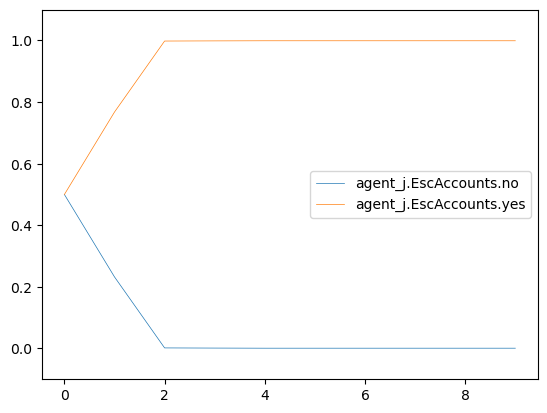

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 1.0                  0.0               Nop             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

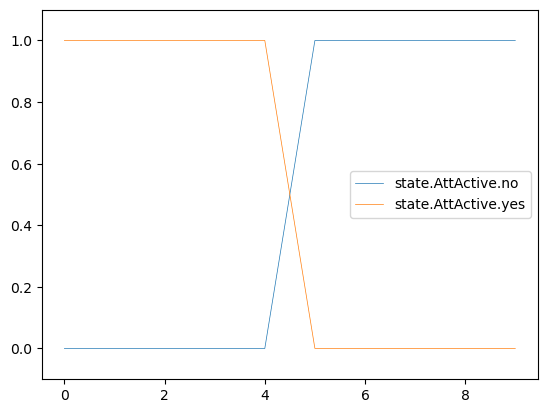

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01               0.500000               Nop   
1          1.020408e-02               0.989796  DeployDataDecoys   
2          1.062699e-04               0.999894               Nop   
3          1.095681e-06               0.999999               Nop   
4          3.068038e-07               1.000000               Nop   
5          9.971432e-01               0.002857               Nop   
6          1.000000e+00               0.000000               Nop   
7          1.000000e+00               0.000000               Nop   
8          1.000000e+00               0.000000               Nop   
9          1.000000e+00               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

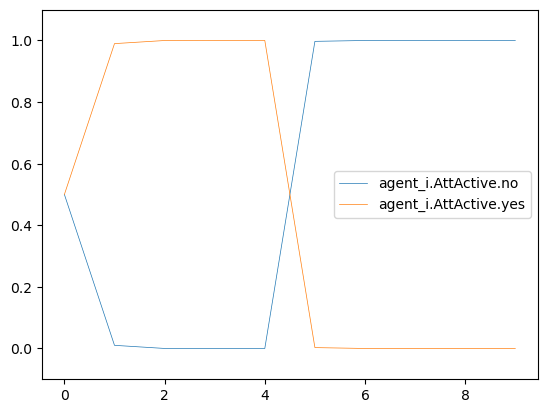

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0  ManipulateData   
4                   0.0                    1.0            Exit   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

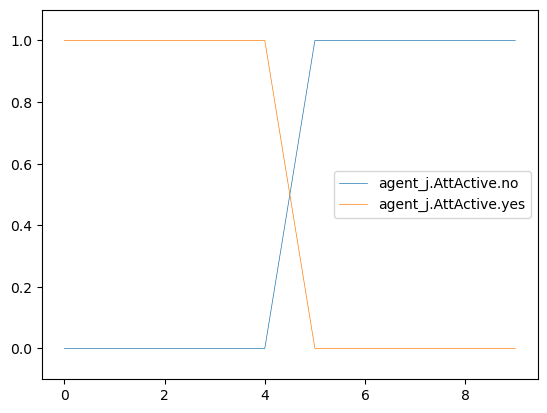

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 0.0                  1.0               Nop             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

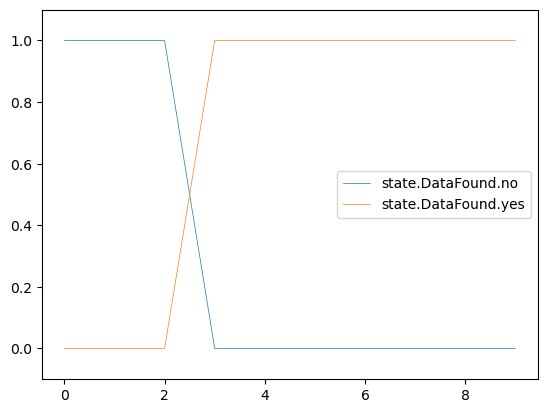

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.208001               0.791999               Nop   
4              0.028873               0.971127               Nop   
5              0.028873               0.971127               Nop   
6              0.028873               0.971127               Nop   
7              0.028873               0.971127               Nop   
8              0.028873               0.971127               Nop   
9              0.028873               0.971127               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

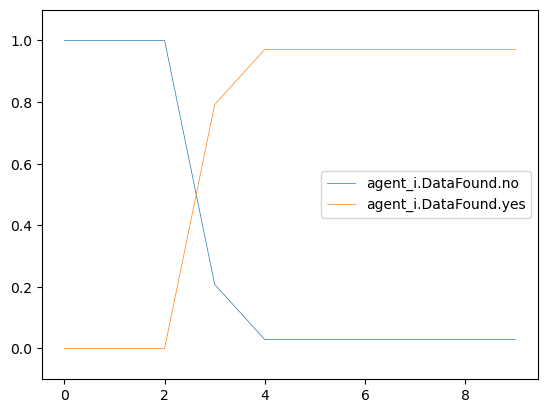

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.205613               0.794387  ManipulateData   
4              0.003293               0.996707            Exit   
5              0.003293               0.996707             Nop   
6              0.003293               0.996707             Nop   
7              0.003293               0.996707             Nop   
8              0.003293               0.996707             Nop   
9              0.003293               0.996707             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

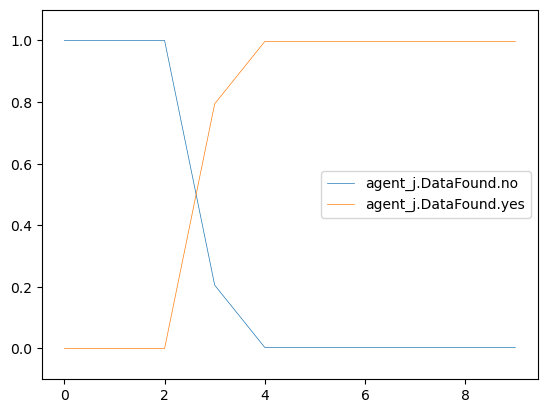

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

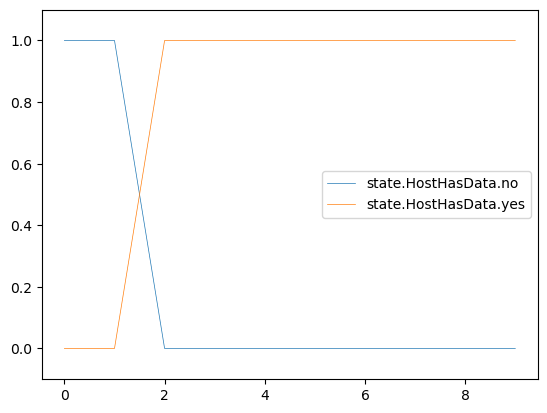

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

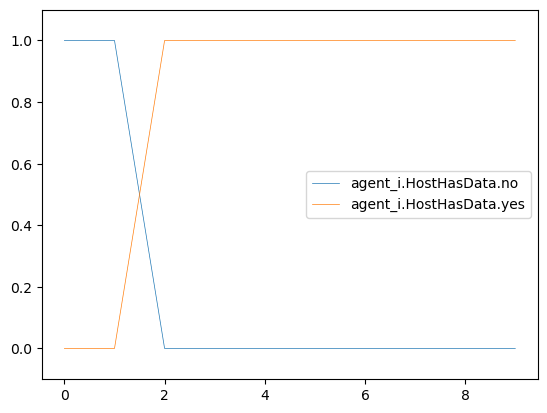

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.339934                 0.660066       FileRecon   
3                0.147649                 0.852351  ManipulateData   
4                0.002332                 0.997668            Exit   
5                0.002332                 0.997668             Nop   
6                0.002332                 0.997668             Nop   
7                0.002332                 0.997668             Nop   
8                0.002332                 0.997668             Nop   
9                0.002332                 0.997668             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

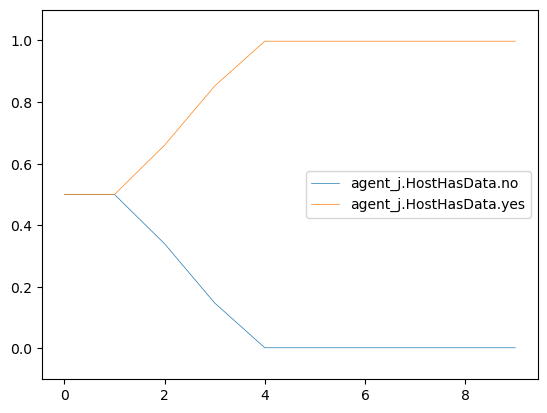

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

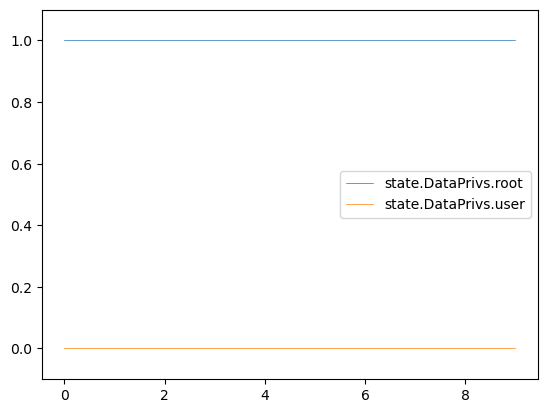

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

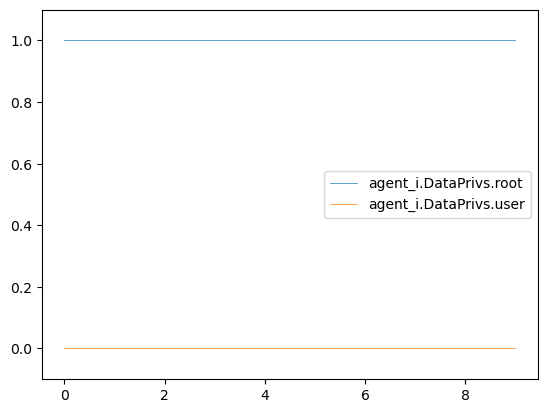

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.499739                0.500261  ManipulateData   
4                0.499541                0.500459            Exit   
5                0.499541                0.500459             Nop   
6                0.499541                0.500459             Nop   
7                0.499541                0.500459             Nop   
8                0.499541                0.500459             Nop   
9                0.499541                0.500459             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

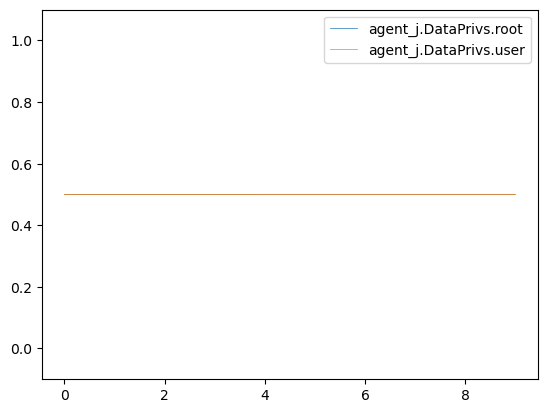

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

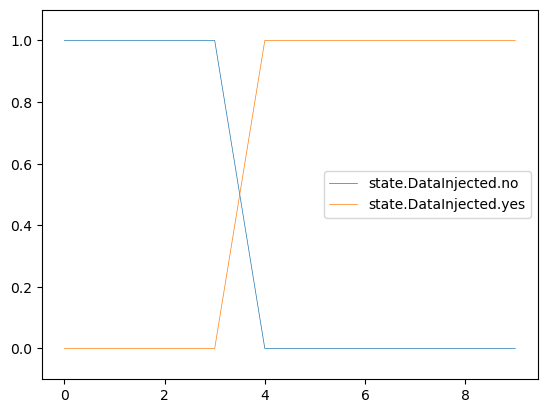

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.031978                  0.968022               Nop   
5                 0.029183                  0.970817               Nop   
6                 0.029183                  0.970817               Nop   
7                 0.029183                  0.970817               Nop   
8                 0.029183                  0.970817               Nop   
9                 0.029183                  0.970817               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

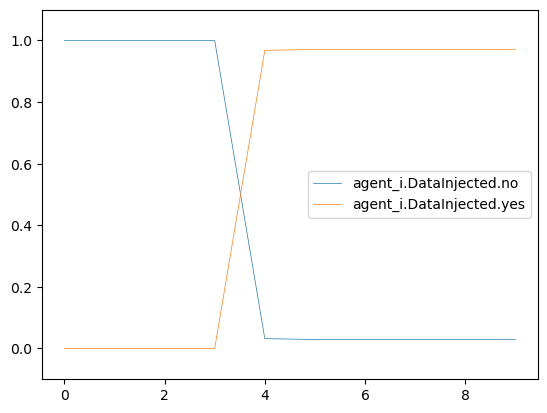

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000  ManipulateData   
4                 0.003293                  0.996707            Exit   
5                 0.003293                  0.996707             Nop   
6                 0.003293                  0.996707             Nop   
7                 0.003293                  0.996707             Nop   
8                 0.003293                  0.996707             Nop   
9                 0.003293                  0.996707             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

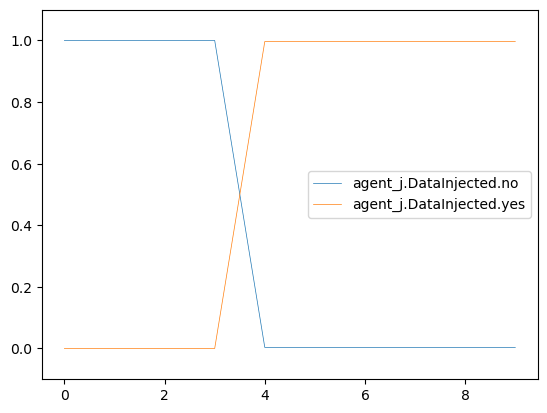

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop  ManipulateData  
4                      1.0               Nop            Exit  
5                      1.0               Nop             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

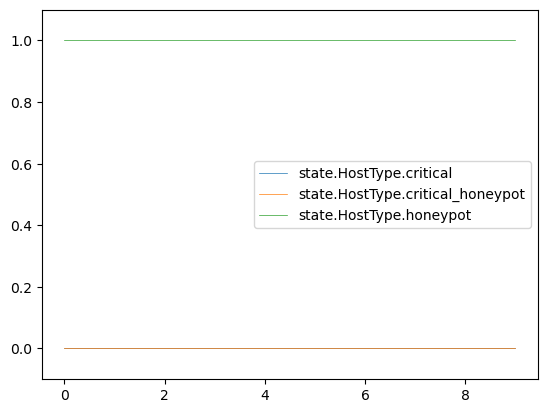

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop  ManipulateData   
4                        1.0               Nop            Exit   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

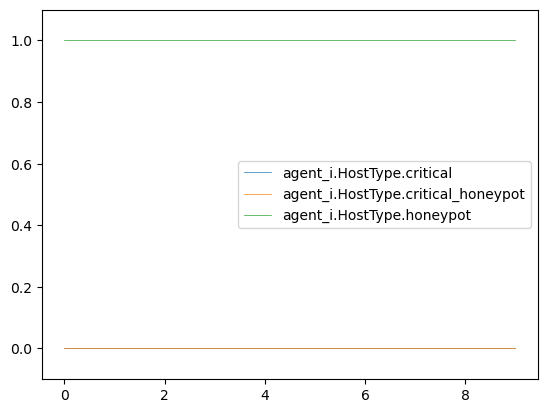

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0  ManipulateData               Nop   
4                        0.0            Exit               Nop   
5                        0.0             Nop               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

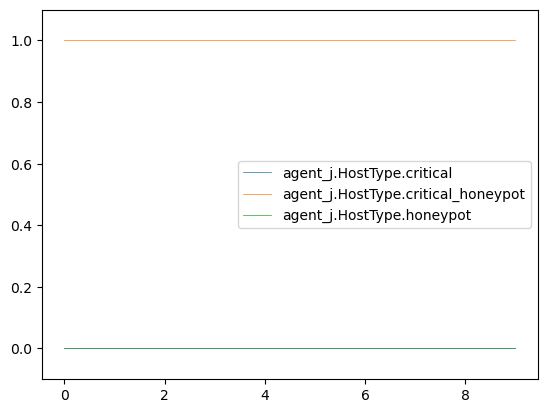

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

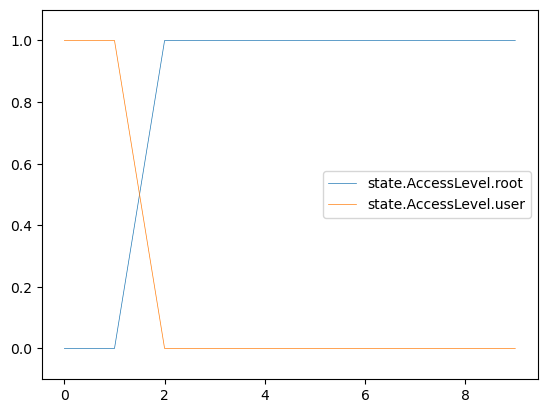

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.989895                  0.010105               Nop   
3                  0.989999                  0.010001               Nop   
4                  0.998516                  0.001484               Nop   
5                  0.998516                  0.001484               Nop   
6                  0.998516                  0.001484               Nop   
7                  0.998516                  0.001484               Nop   
8                  0.998516                  0.001484               Nop   
9                  0.998516                  0.001484               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

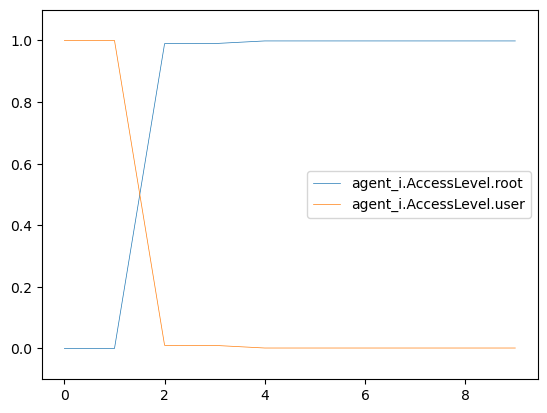

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.998152                  0.001848       FileRecon   
3                  0.998673                  0.001327  ManipulateData   
4                  0.999069                  0.000931            Exit   
5                  0.999069                  0.000931             Nop   
6                  0.999069                  0.000931             Nop   
7                  0.999069                  0.000931             Nop   
8                  0.999069                  0.000931             Nop   
9                  0.999069                  0.000931             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

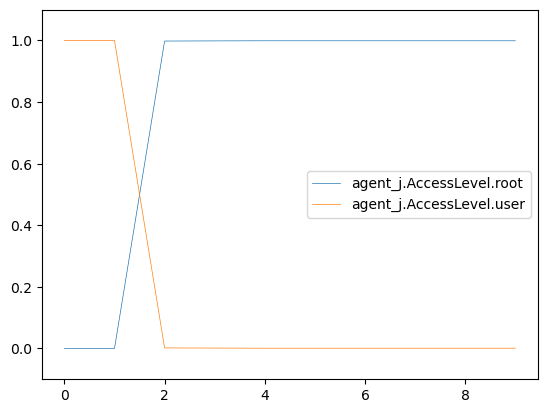

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop  ManipulateData
4                0.0                 1.0               Nop            Exit
5                0.0                 1.0               Nop             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

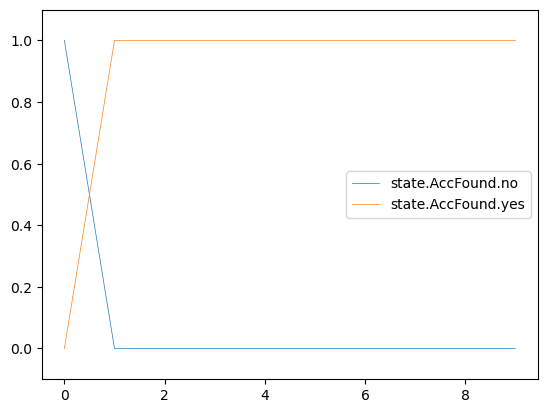

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.020102              0.979898  DeployDataDecoys   
2             0.010105              0.989895               Nop   
3             0.010001              0.989999               Nop   
4             0.001484              0.998516               Nop   
5             0.001484              0.998516               Nop   
6             0.001484              0.998516               Nop   
7             0.001484              0.998516               Nop   
8             0.001484              0.998516               Nop   
9             0.001484              0.998516               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

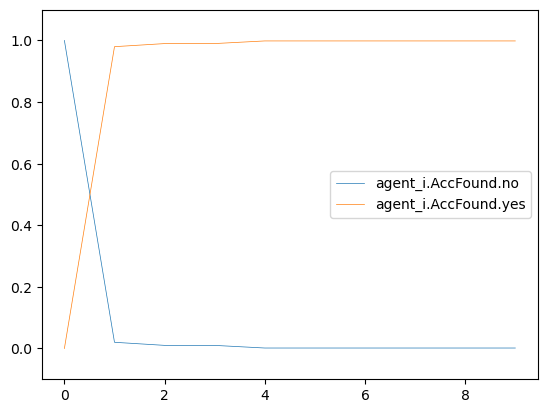

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.234702              0.765298      PrivEscAcc   
2             0.001848              0.998152       FileRecon   
3             0.001327              0.998673  ManipulateData   
4             0.000931              0.999069            Exit   
5             0.000931              0.999069             Nop   
6             0.000931              0.999069             Nop   
7             0.000931              0.999069             Nop   
8             0.000931              0.999069             Nop   
9             0.000931              0.999069             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

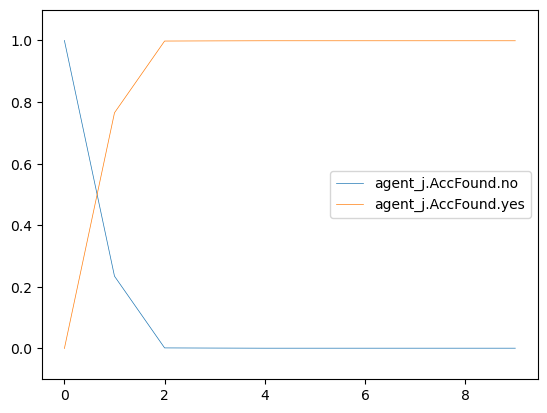

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

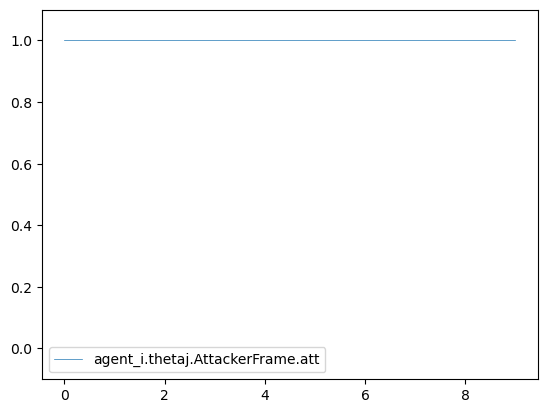

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.248127                        0.751873   
4                         0.350097                        0.649903   
5                         0.491613                        0.508387   
6                         0.491613                        0.508387   
7                         0.491613                        0.508387   
8                         0.491613                        0.508387   
9                         0.491613                        0.508387   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

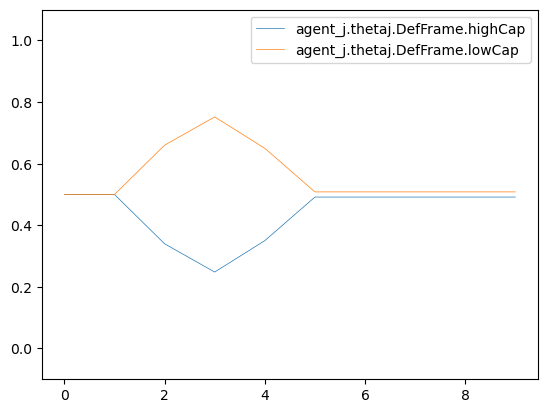

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

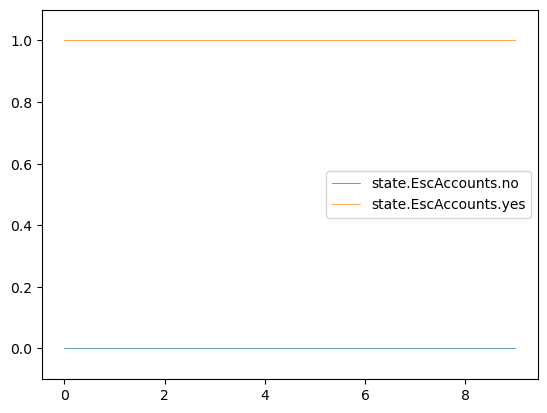

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

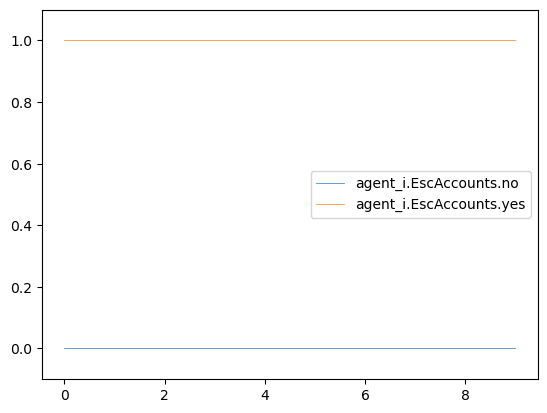

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.766601                 0.233399      PrivEscAcc   
2                0.155512                 0.844488       FileRecon   
3                0.192803                 0.807197       FileRecon   
4                0.148252                 0.851748  ManipulateData   
5                0.086440                 0.913560            Exit   
6                0.086440                 0.913560             Nop   
7                0.086440                 0.913560             Nop   
8                0.086440                 0.913560             Nop   
9                0.086440                 0.913560             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

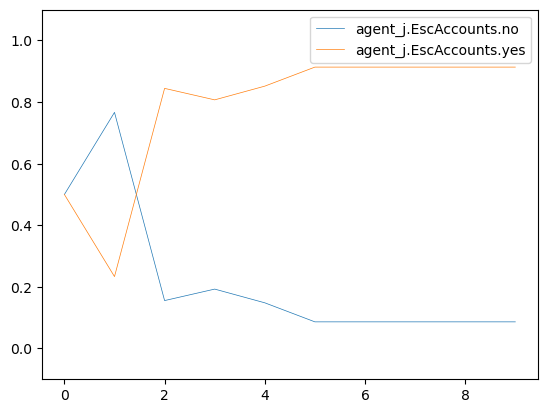

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

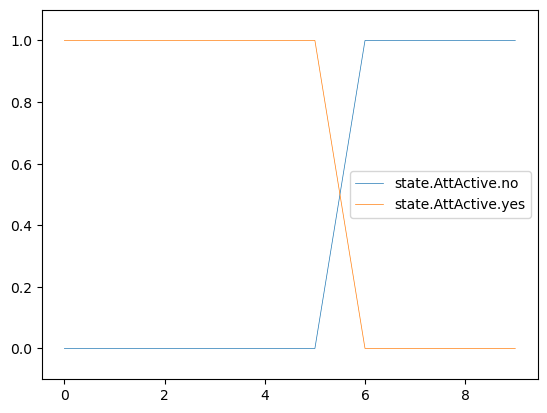

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000               0.500000               Nop   
1              0.010204               0.989796  DeployDataDecoys   
2              0.000106               0.999894               Nop   
3              0.008222               0.991778               Nop   
4              0.000312               0.999688               Nop   
5              0.066061               0.933939               Nop   
6              1.000000               0.000000               Nop   
7              1.000000               0.000000               Nop   
8              1.000000               0.000000               Nop   
9              1.000000               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

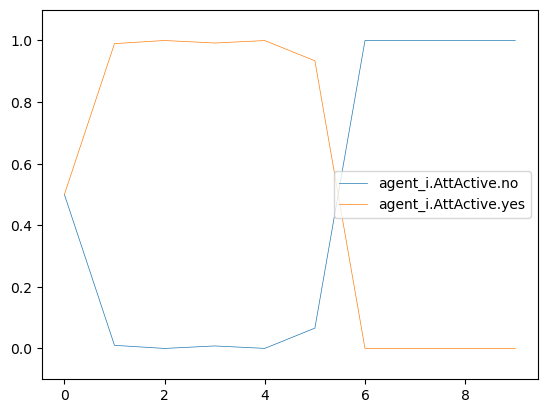

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

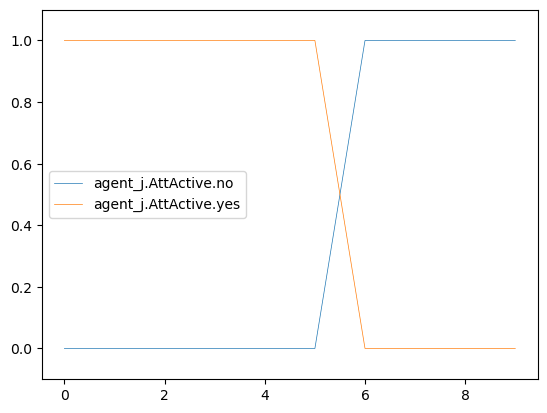

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

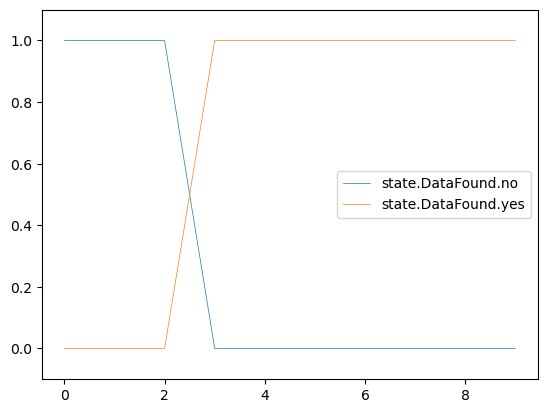

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.214512               0.785488               Nop   
4              0.163985               0.836015               Nop   
5              0.058630               0.941370               Nop   
6              0.058630               0.941370               Nop   
7              0.058630               0.941370               Nop   
8              0.058630               0.941370               Nop   
9              0.058630               0.941370               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

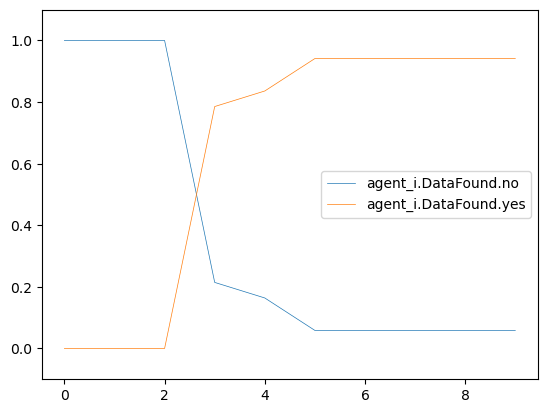

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.780829               0.219171       FileRecon   
4              0.372374               0.627626  ManipulateData   
5              0.011993               0.988007            Exit   
6              0.011993               0.988007             Nop   
7              0.011993               0.988007             Nop   
8              0.011993               0.988007             Nop   
9              0.011993               0.988007             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

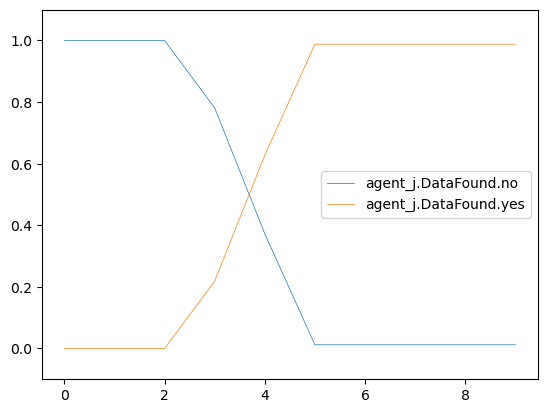

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

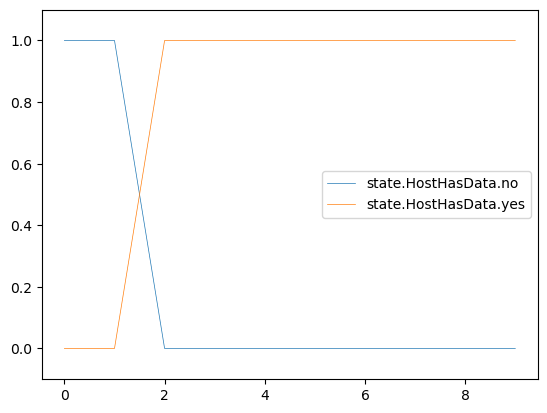

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

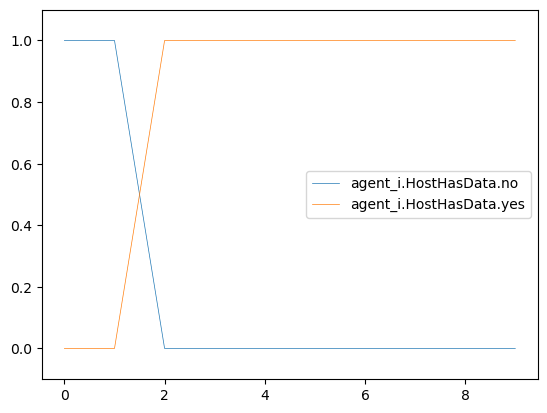

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.339934                 0.660066       FileRecon   
3                0.515742                 0.484258       FileRecon   
4                0.299563                 0.700437  ManipulateData   
5                0.009644                 0.990356            Exit   
6                0.009644                 0.990356             Nop   
7                0.009644                 0.990356             Nop   
8                0.009644                 0.990356             Nop   
9                0.009644                 0.990356             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

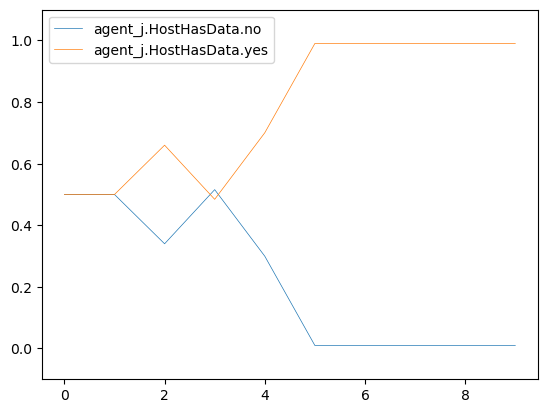

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

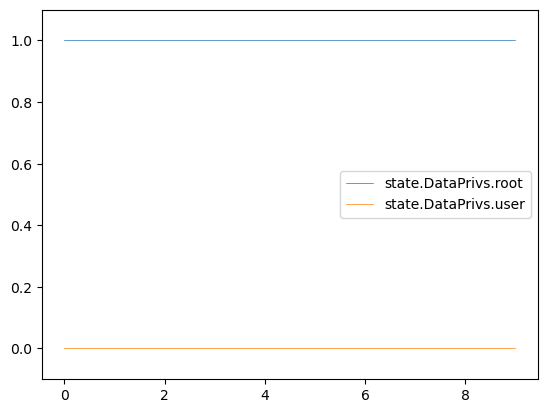

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

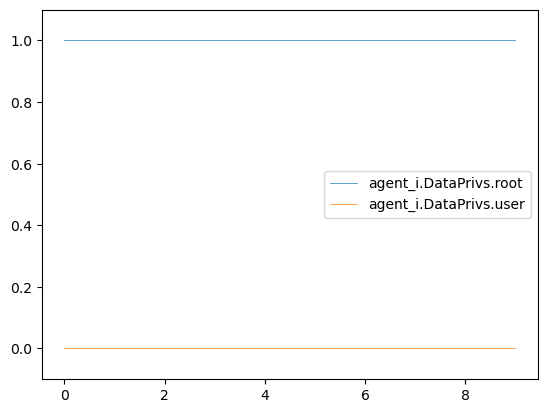

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.522341                0.477659       FileRecon   
4                0.495651                0.504349  ManipulateData   
5                0.458619                0.541381            Exit   
6                0.458619                0.541381             Nop   
7                0.458619                0.541381             Nop   
8                0.458619                0.541381             Nop   
9                0.458619                0.541381             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

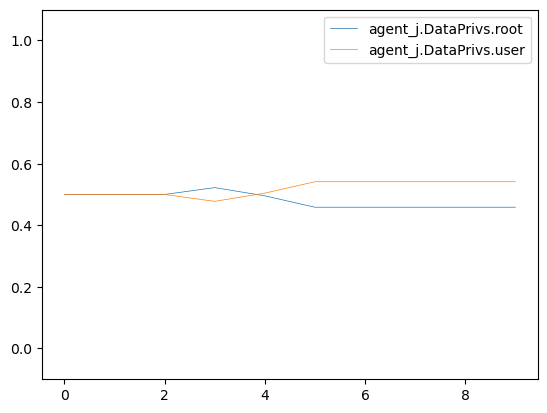

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

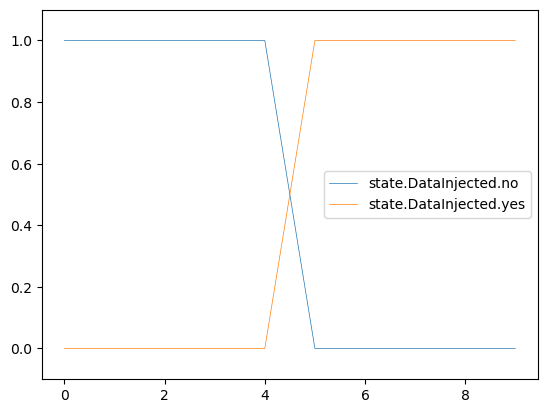

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.973186                  0.026814               Nop   
5                 0.079558                  0.920442               Nop   
6                 0.079558                  0.920442               Nop   
7                 0.079558                  0.920442               Nop   
8                 0.079558                  0.920442               Nop   
9                 0.079558                  0.920442               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

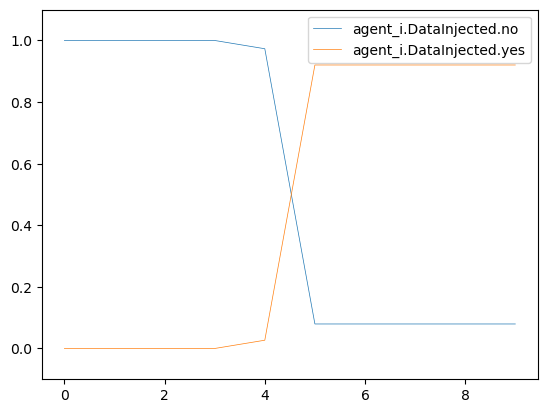

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.011993                  0.988007            Exit   
6                 0.011993                  0.988007             Nop   
7                 0.011993                  0.988007             Nop   
8                 0.011993                  0.988007             Nop   
9                 0.011993                  0.988007             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

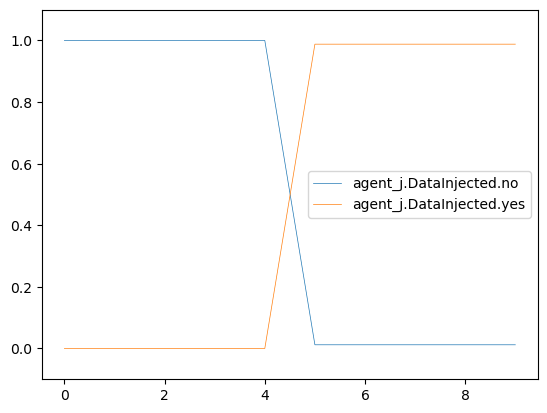

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

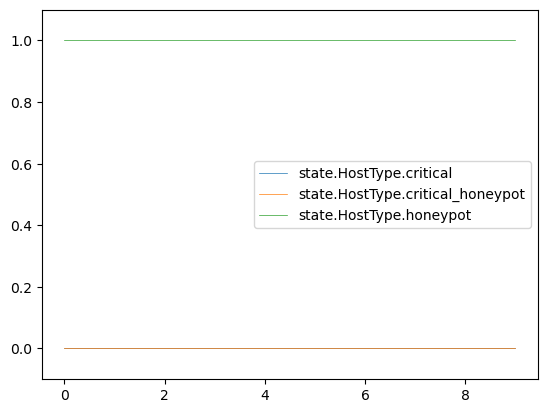

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                             none  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

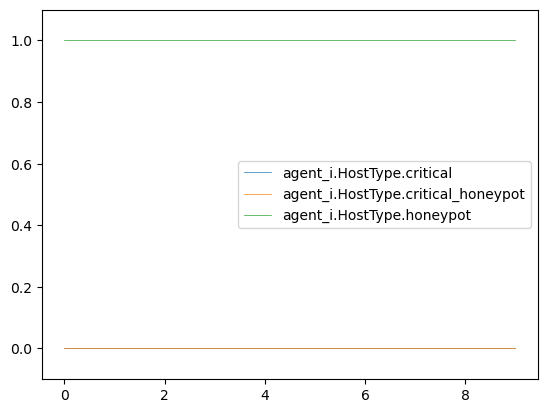

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

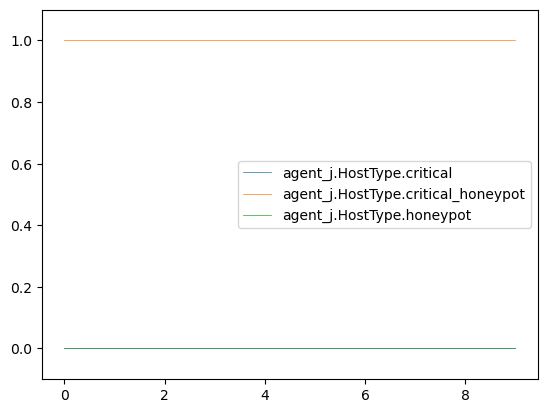

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

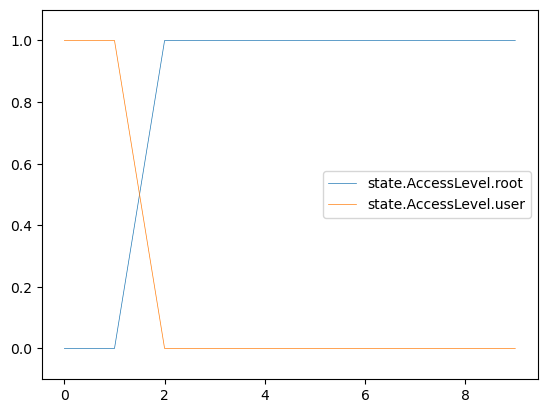

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.989895                  0.010105               Nop   
3                  0.981860                  0.018140               Nop   
4                  0.966810                  0.033190               Nop   
5                  0.988146                  0.011854               Nop   
6                  0.988146                  0.011854               Nop   
7                  0.988146                  0.011854               Nop   
8                  0.988146                  0.011854               Nop   
9                  0.988146                  0.011854               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

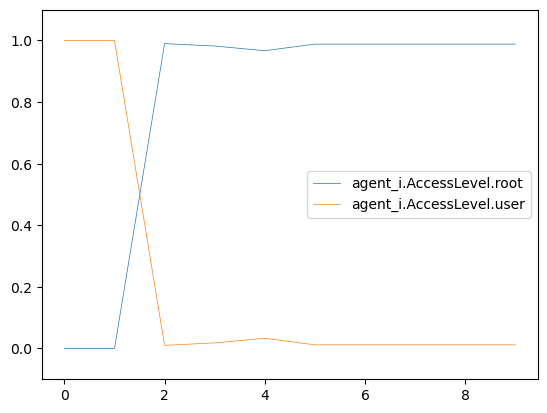

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.842933                  0.157067       FileRecon   
3                  0.805269                  0.194731       FileRecon   
4                  0.850265                  0.149735  ManipulateData   
5                  0.912695                  0.087304            Exit   
6                  0.912696                  0.087304             Nop   
7                  0.912696                  0.087304             Nop   
8                  0.912696                  0.087304             Nop   
9                  0.912696                  0.087304             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

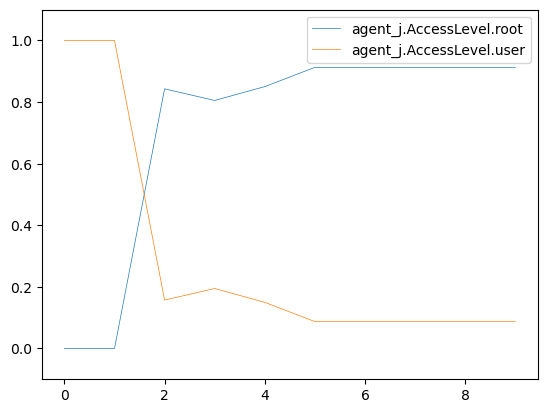

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

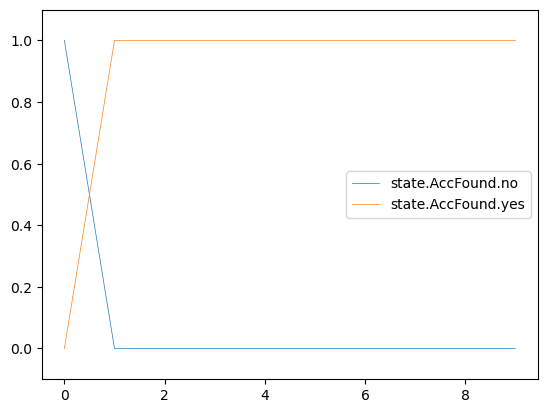

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.020102              0.979898  DeployDataDecoys   
2             0.010105              0.989895               Nop   
3             0.018140              0.981860               Nop   
4             0.033190              0.966810               Nop   
5             0.011854              0.988146               Nop   
6             0.011854              0.988146               Nop   
7             0.011854              0.988146               Nop   
8             0.011854              0.988146               Nop   
9             0.011854              0.988146               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

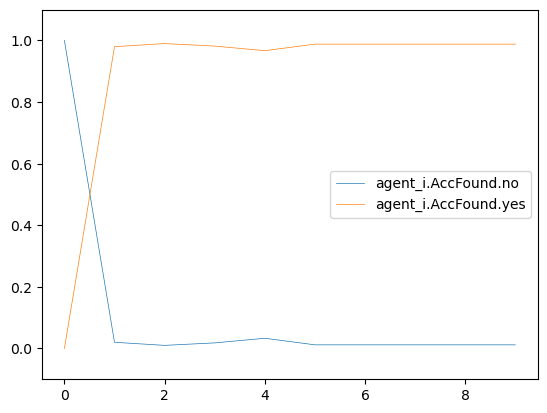

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.774267              0.225733      PrivEscAcc   
2             0.157067              0.842933       FileRecon   
3             0.194731              0.805269       FileRecon   
4             0.149735              0.850265  ManipulateData   
5             0.087304              0.912695            Exit   
6             0.087304              0.912696             Nop   
7             0.087304              0.912696             Nop   
8             0.087304              0.912696             Nop   
9             0.087304              0.912696             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                         none   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

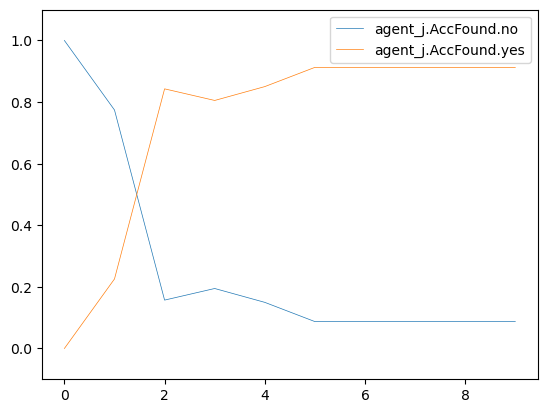

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)
    

# Get divergence
def print_divergence():
    divs = []
    
    for trace in TRACE_FILES:
        data = load_json(trace)
    
        dataframe = pandas.json_normalize(data)    
        state_vars = get_state_vars(dataframe.columns)
        
        agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
        agent_j_data = filter_columns_by_agent(dataframe, "agent_j")

    for i in range(len(keys)):
        print(f"Plotting for {keys[i]}")

        i_means = numpy.mean(divs[i][0], axis=0)
        i_dev = numpy.std(divs[i][0], axis=0)
        plotter.errorbar(numpy.linspace(1, i_means.shape[0], i_means.shape[0]), i_means, fmt='r-.', yerr=i_dev, linewidth=0.5)

        if len(divs[i]) > 1:
            j_means = numpy.mean(divs[i][1], axis=0)
            j_dev = numpy.std(divs[i][1], axis=0)
            plotter.errorbar(numpy.linspace(1, j_means.shape[0], j_means.shape[0]), j_means, fmt='b-.', yerr=j_dev, linewidth=0.5)
            # plotter.plot(divs[i][1].T, 'b-.', linewidth=0.5)

        plotter.ylim(-0.1, 2)
        plotter.show()

    